<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 9: *Clustering***

###**Tenggat Waktu: 26 Mei 2023, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: F_Lab9_1806205773_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 26 Mei 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.



## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Fitri 'Aliyah"
KELAS = "B"
NPM = "2006597115"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fitri 'Aliyah dari kelas B dengan NPM 2006597115, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fitri 'Aliyah)


In [ ]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer  # jika tidak bisa, jalankan perintah pip install yellowbrick
from sklearn.cluster import AgglomerativeClustering

# surpress future warning
import warnings
warnings.filterwarnings("ignore")

# Membuat visualisasi yang dihasilkan lebih tajam
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# **Materi Clustering**

## **Definisi**

_Clustering_ yang merupakan bagian dari _unsupervised learning_ adalah proses mengelompokkan sekumpulan _data points_ ke dalam beberapa grup/klaster sedemikian sehingga objek pada klaster yang sama memiliki _similarity_ yang tinggi sedangkan pada klaster berbeda sebaliknya. Berbeda dengan _supervised learning_, _clustering_ tidak memerlukan label yang bersesuaian dengan setiap objek sehingga yang dilakukan adalah mencari pola dari data (belum tentu ada, bisa saja datanya memang tidak berkelompok). Sebagai catatan, algoritma _clustering_ tidak secara eksplisit menjelaskan makna tiap klaster sehingga Anda harus menginterpretasikannya sendiri (misalnya dengan memvisualisasikannya seperti yang akan dibahas di lab kali ini).

Namun, apa motivasi dari _unsupervised learning_? Bukankah cukup melakukan _supervised learning_ saja yang sudah jelas targetnya? Tentu tidak demikian, ada setidaknya dua _use cases_ dari _unsupervised learning_, khususnya _clustering_. Yang pertama adalah sebagai langkah awal untuk memahami data (mungkin saja ditemukan pola tertentu yang menarik untuk diteliti lebih lanjut). Yang kedua adalah untuk menghindari perlunya mengumpulkan _labeled data_ karena bisa jadi mahal dan memakan banyak waktu (bayangkan misalnya Anda meminta arkeolog untuk melabeli _dataset_ artefak prasejarah).

Setelah memahami _clustering_ dan motivasinya, selanjutnya adalah bagaimana cara melakukan _clustering_? Ada banyak algoritma _clustering_, tetapi yang akan digunakan untuk lab ini adalah _K-Means clustering_ dan _hierarchical clustering_ (yang *Agglomerative*). Perbedaannya adalah _hierarchical clustering_ memungkinkan adanya subklaster.

## **K-Means Clustering**

K-Means adalah salah satu algoritma _clustering_ yang paling populer karena relatif sederhana dan bisa *scale* ke dataset yang berukuran besar. Huruf 'K' pada namanya bermakna jumlah klaster yang dibentuk. Seperti yang dibahas di kelas, cara kerjanya adalah sebagai berikut.

1. Tentukan k jumlah klaster (di sini k adalah *hyperparameter* yang harus dicari, bukan dilatih oleh model), lalu tentukan posisi awal k *centroids* (bisa secara acak).
2. Kelompokkan tiap _data points_ ke klaster dengan *centroid* terdekat (berdasarkan metriks jarak tertentu, misalnya *euclidian distance*).
3. Pindahkan posisi *centroids* ke tengah masing-masing klaster (dengan menggunakan rata-rata), lalu kalkulasikan ulang klaster untuk tiap *data points*.
4. Ulangi tahap 2 dan 3 hingga "*stopping criteria*" terpenuhi.

Selanjutnya mari kita lihat bagaimana penerapan algoritma tersebut menggunakan implementasi K-means dari Scikit-Learn, yaitu `sklearn.cluster.KMeans`. Konteksnya adalah melakukan segmentasi data pelanggan mall. Mengapa perlu melakukan hal tersebut? Salah satu manfaatnya adalah mall dapat menyesuaikan strategi bisnisnya agar pemasukan dapat meningkat menyesuaikan dengan tipe pelanggan yang ada. Berikut adalah penjelasan tiap atribut pada dataset tersebut.

**Penjelasan Dataset**

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| CustomerID                   | ID pelanggan                              |
| Gender             | Gender pelanggan                |
| Age | Usia pelanggan |
| Annual Income               | Pendapatan tahunan (x1000 USD)        |
| Spending Score               | Skor yang diberikan mall untuk pelanggan berdasarkan kebiasaan berbelanja        |

> Dataset diambil dari https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### **Pre-processing Data**

Sebelum menjalankan algoritma *clustering*, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan *pre-processing* pada data agar siap digunakan untuk *clustering* menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

1. _Handle_ _missing value_: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan _missing value_ tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
2. _Handle_ *outliers*: Algoritma K-Means sangat sensitif terhadap *outliers* (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle *outliers* dengan *heuristics* tertentu (misalnya dengan metode [_capping_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html)).
3. Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
4. Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti [K-Prototypes](https://cse.hkust.edu.hk/~qyang/Teaching/537/Papers/huang98extensions.pdf), tetapi hal tersebut di luar _scope_ lab ini).

In [ ]:
# Read dataset materi
df = pd.read_csv('data_pelanggan_mall.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


> Bisa dilihat bahwa atribut numeriknya ada tiga (Age, Annual Income, dan Spending Score) sedangkan atribut kategorikalnya ada satu (Gender). Untuk CustomerID bisa di-drop karena hanya sebagai penanda unik tiap pelanggan, bukan hasil pengukuran tertentu.

In [ ]:
# Drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
# Memahami informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Hal selanjutnya yang dilakukan adalah memilih fitur-fitur yang akan digunakan untuk segmentasi data pelanggan. Sebagai contoh, akan digunakan 2 fitur numerik (Age dan Annual Income) serta 1 fitur kategorikal (Gender). Mari kita lakukan pre-processing seperti yang disebutkan di atas.

In [ ]:
# 1. Handle missing value
print(f"Jumlah missing value:\n{df.isnull().sum()}")  # Tidak ada missing value

Jumlah missing value:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


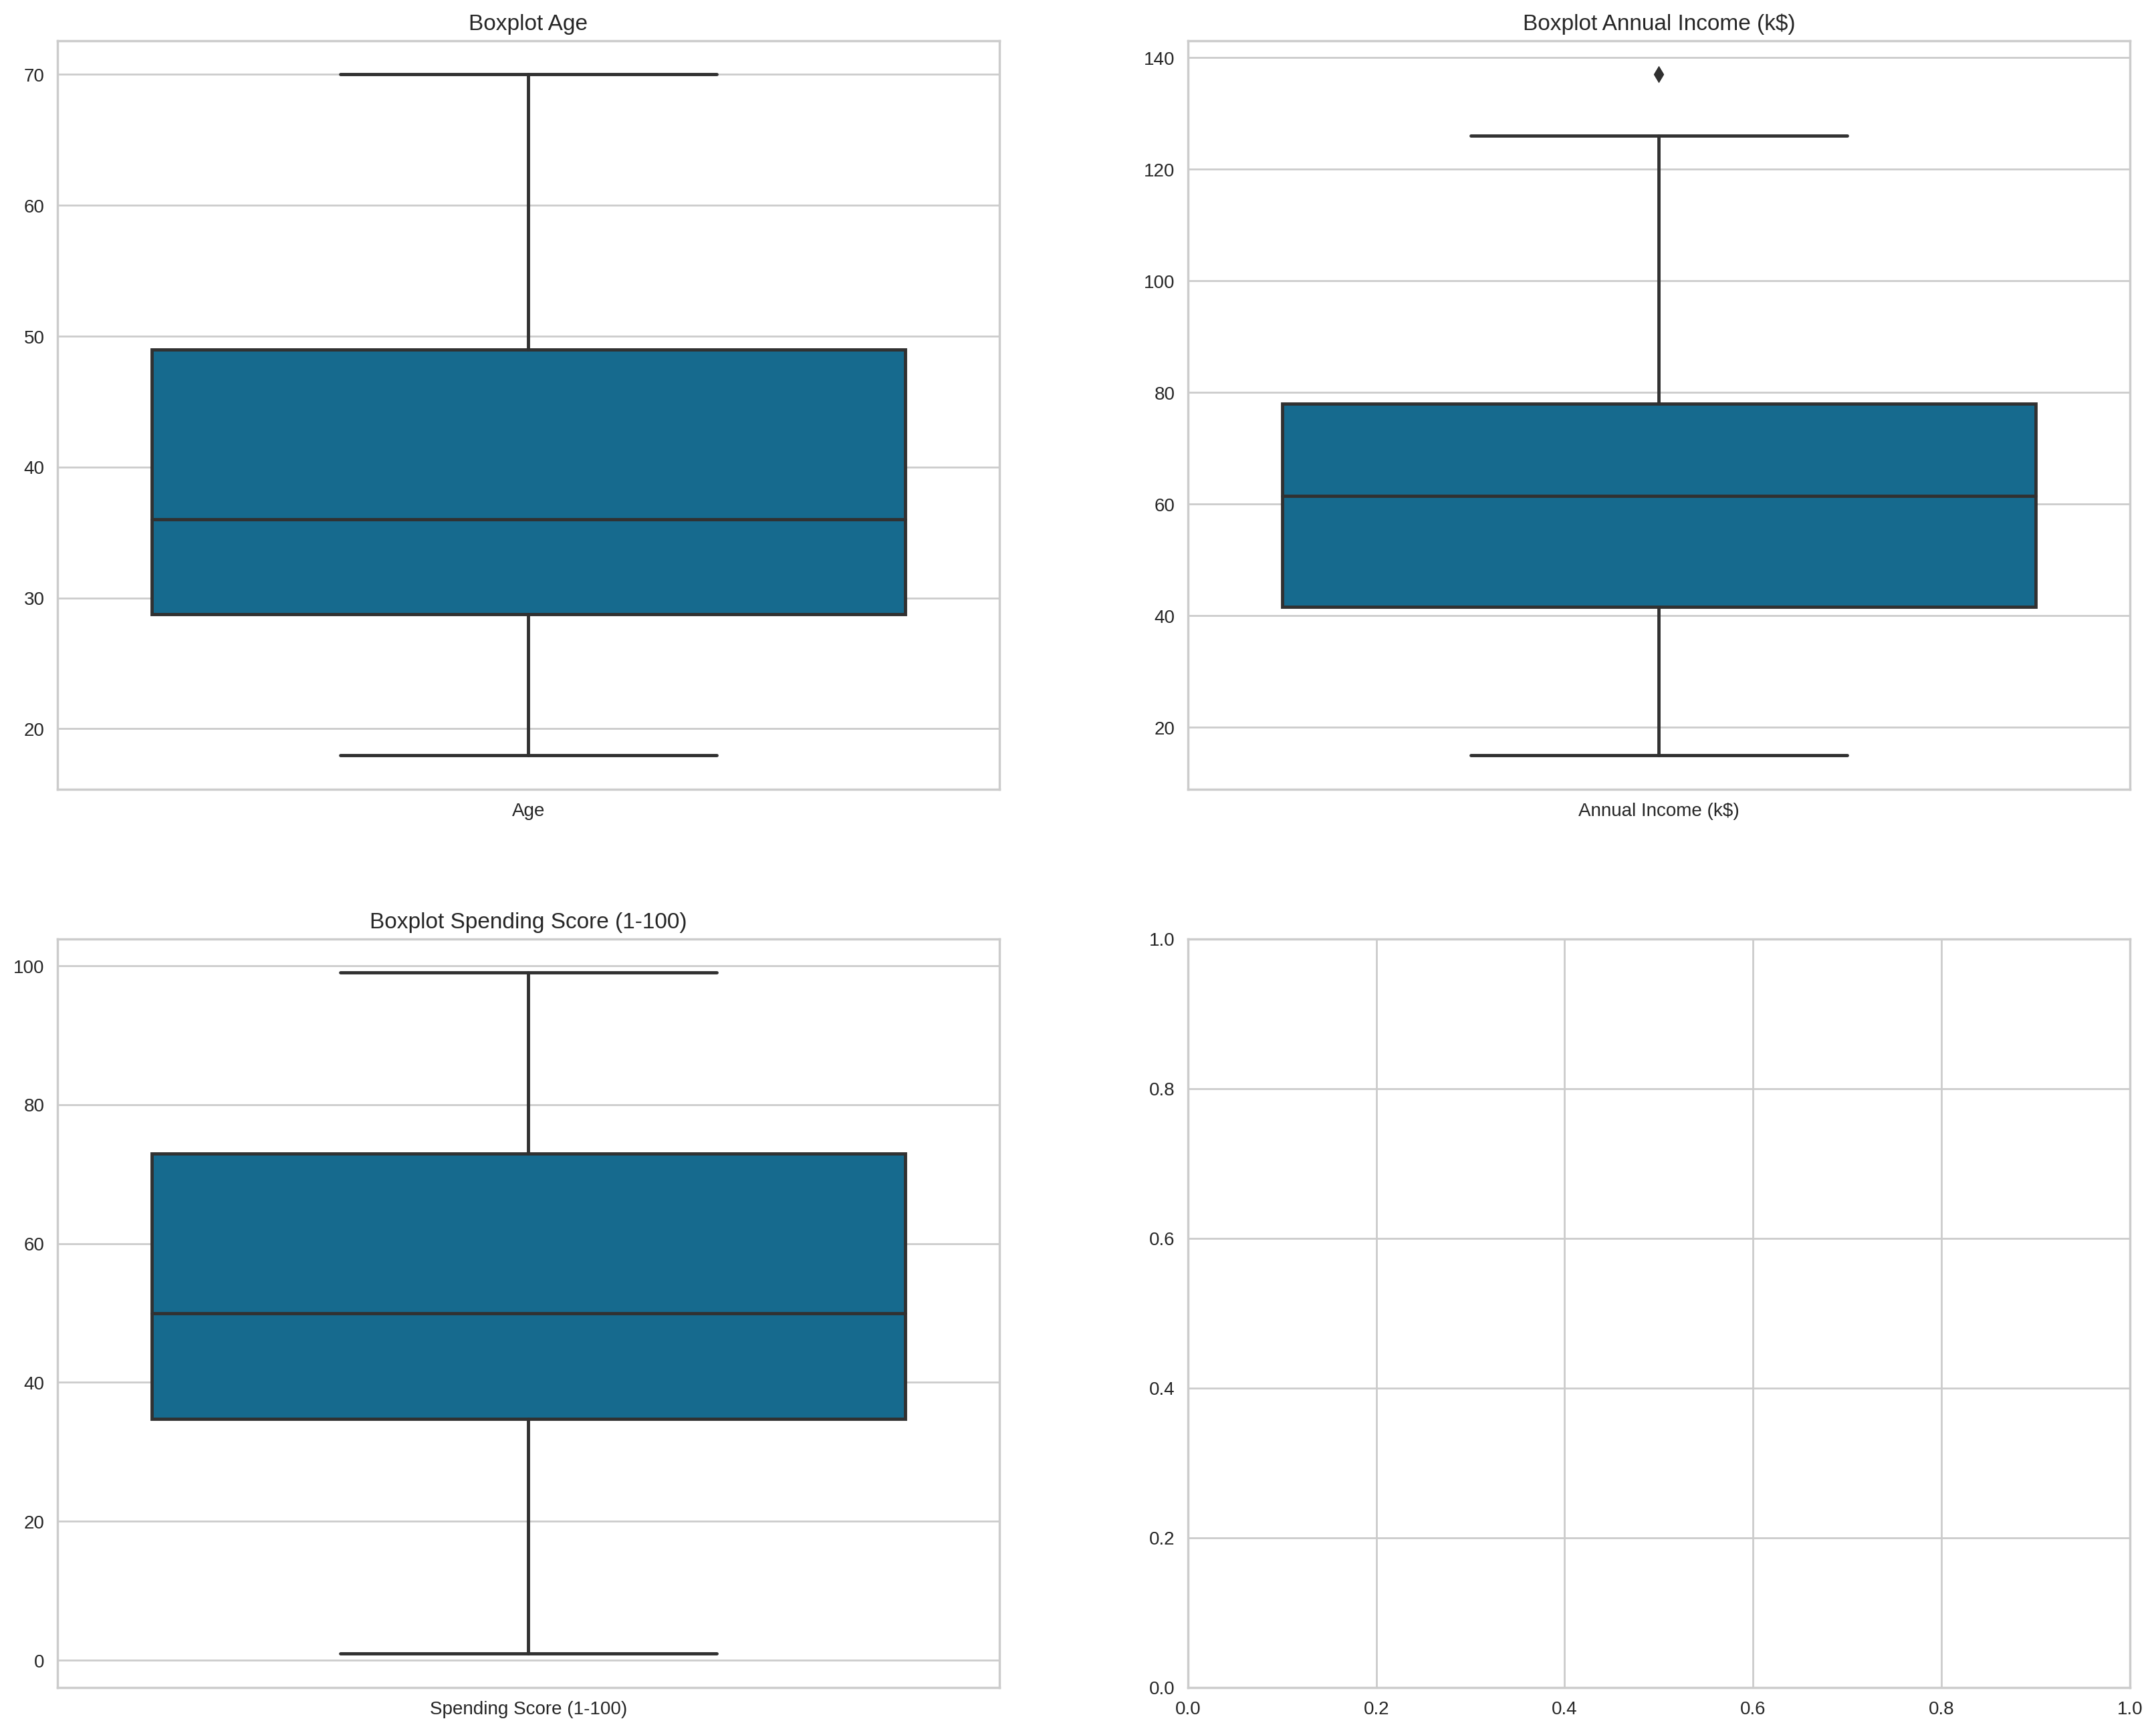

In [ ]:
# 2. Cek outliers
def show_boxplot(df):
  fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,16))
  plot_num = 1

  for column in df.columns:
    if column != 'Gender':
      plt.subplot(2,2,plot_num)
      sns.boxplot(data=df[[column]])
      plt.title(f"Boxplot {column}")
      plot_num += 1
  plt.show()

show_boxplot(df)

In [ ]:
# Menghitung jumlah outliers tiap atribut
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

Age                       0
Annual Income (k$)        2
Gender                    0
Spending Score (1-100)    0
dtype: int64


Secara visual, ada dua *potential outliers* pada atribut Annual Income. Cara penanganannya beragam tergantung asumsi/*domain knowledge* yang dimiliki dari dataset. Untuk contoh ini, kita asumsikan bahwa memang ada pelanggan dengan penghasilan tahunan melebihi pelanggan-pelanggan lainnya sehingga tidak perlu dihapus (selain karena jumlahnya yang sangat sedikit relatif terhadap jumlah data).

In [ ]:
# 3. Standarisasi atribut numerik yang dipilih
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['Age', 'Annual Income (k$)']

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_attributes]), columns=numerical_attributes)
df_std['Gender'] = df['Gender']  # Membiarkan dulu atribut kategorikal
df_std.head()

,Age,Annual Income (k$),Gender
0,-1.424569,-1.738999,Male
1,-1.281035,-1.738999,Male
2,-1.352802,-1.700830,Female
3,-1.137502,-1.700830,Female
4,-0.563369,-1.662660,Female


In [ ]:
# 4. Encoding atribut kategorikal
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_std['Gender'] = le.fit_transform(df_std['Gender'])
df_std.head()

,Age,Annual Income (k$),Gender
0,-1.424569,-1.738999,1
1,-1.281035,-1.738999,1
2,-1.352802,-1.700830,0
3,-1.137502,-1.700830,0
4,-0.563369,-1.662660,0


### **Persiapan Clustering**

Selanjutnya, kita harus menentukan nilai K sebagai input dari algoritma K-means. Salah satu metriks yang biasa digunakan adalah Silhouette Coefficient $s(C)$ untuk mengukur seberapa 'baik' klaster yang dihasilkan. Yang dimaksud dengan 'baik' adalah elemen di klaster yang sama semirip mungkin sedangkan di klaster berbeda sebaliknya. Interpretasi dari Silhouette Coefficient terhadap stuktur dari hasil *clustering* adalah sebagai berikut.

1. $0.7 < s(C) \leq 1$: struktur kuat
2. $0.5 < s(C) \leq 0.7$: struktur sedang
3. $0.25 < s(C) \leq 0.5$: struktur lemah
4. $s(C) \leq 0.25$: tidak ada struktur

> Anda bisa baca lebih lanjut di [sini](https://www.sciencedirect.com/topics/computer-science/silhouette-coefficient) jika tertarik untuk memahami lebih dalam terkait Silhouette Coefficient.

Mari kita hitung Silhouette Coefficient untuk $2 \leq k \leq 6$ beserta visualisasinya untuk menentukan nilai k yang akan kita gunakan (Anda bisa bereksperimen dengan berbagai rentang nilai k).

In [ ]:
def compute_silhouette_coef(df: pd.DataFrame, k_lower: int, k_upper: int):
    print("Komparasi silhouette coefficient untuk k berbeda:")
    print("=================================================")
    for k in [*range(k_lower, k_upper+1)]:
        # Mendefinisikan model K-Means dengan nilai k tertentu
        clusterer = KMeans(n_clusters = k)

        # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(
            f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}"
        )

In [ ]:
compute_silhouette_coef(df_std, 2, 6)

Komparasi silhouette coefficient untuk k berbeda:
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.3203927945788541
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3723496271989909
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.3197274150416494
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.3025290517210199
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.3090522031620999


> Bisa dilihat bahwa dengan nilai $k=3$, skornya paling tinggi pada rentang yang kita tentukan (meskipun secara struktur tergolong lemah). Kita akan komparasikan secara visual untuk mendapatkan *insight* yang lebih baik.

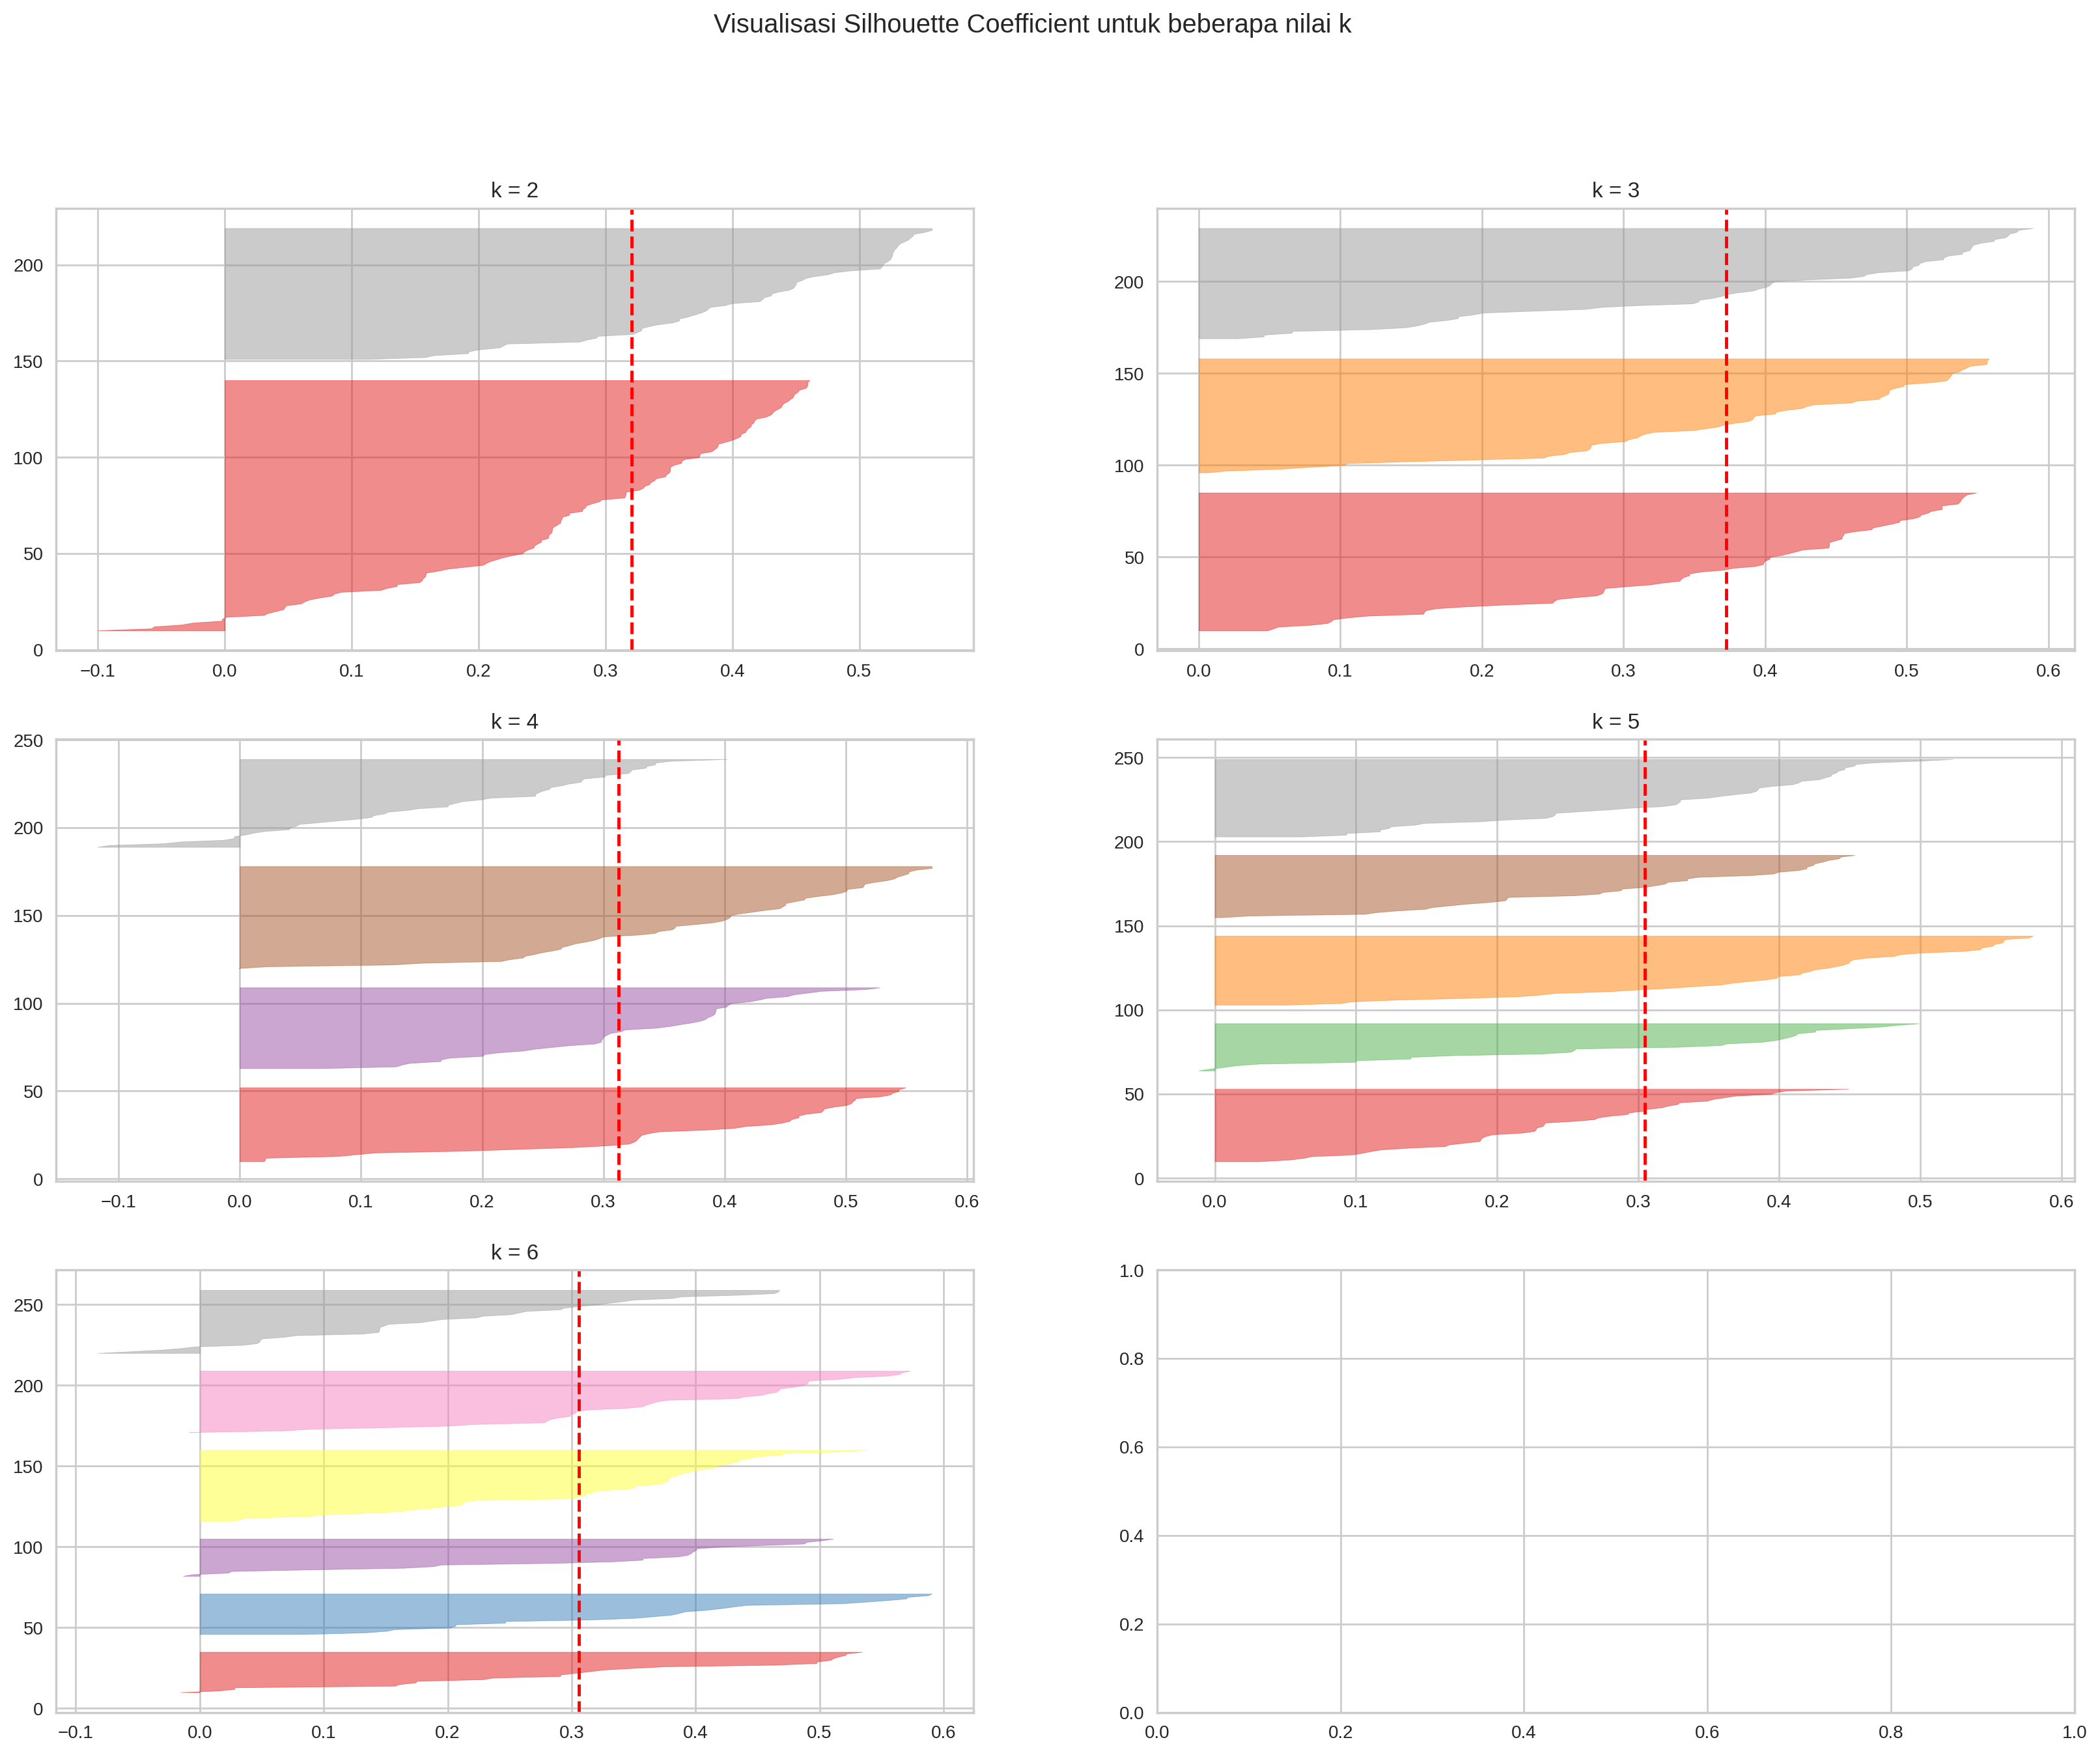

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5, 6]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_std)

> Sejalan dengan hasil sebelumnya, nilai k = 3 menunjukkan hasil *clustering* yang paling optimal karena nilai silhouette_coefficient tiap klaster telah melewati reratanya (garis merah vertikal) dan densitas kedua klaster kurang lebih rata.

Selain Silhouette Coefficient, ada juga metode lain untuk menentukan jumlah klaster, yaitu menggunakan Elbow Method. Cara kerjanya adalah menampilkan plot inersia di berbagai nilai k yang menunjukkan seberapa baik klaster yang dihasilkan terhadap datanya. Namun, inersia akan selalu turun seiring dengan meningkatnya jumlah klaster sedangkan kondisi yang diharapkan adalah inersia dan jumlah klaster keduanya rendah. Oleh karena itu, dilakukan *tradeoff* antara keduanya dengan memilih "titik belok" di mana terjadi perubahan drastis pada gradien kurva (akan ditampilkan pada visualisasi di bawah). Jika tertarik mempelajari lebih lanjut, anda bisa merujuk ke [sini](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet).

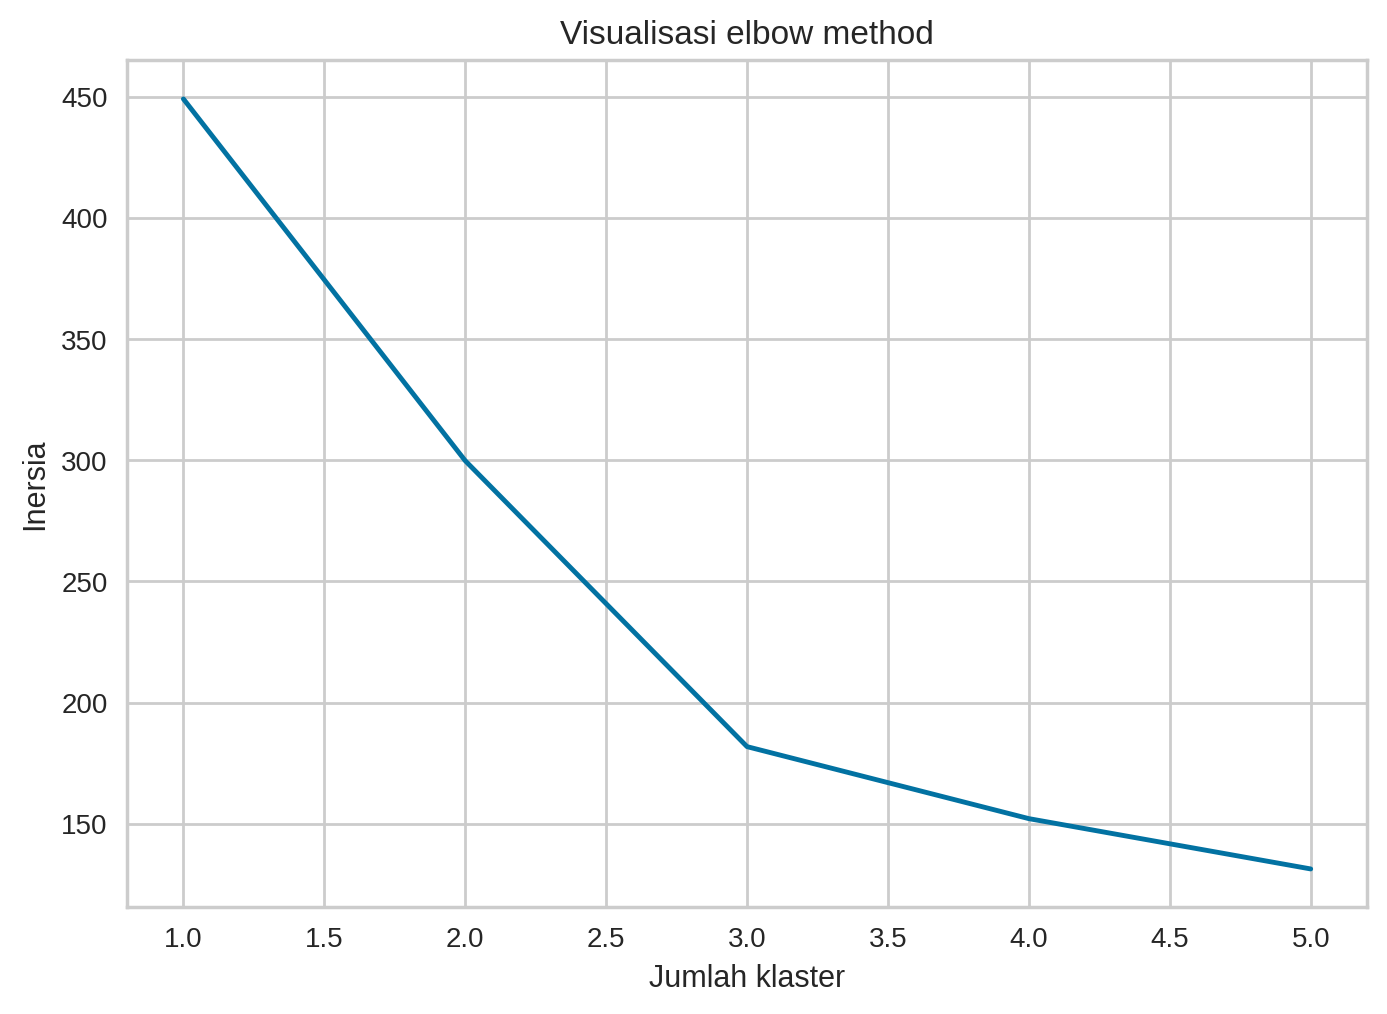

In [ ]:
# Visualisasi inertia (sum of squared distances) dengan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster)
    km = km.fit(df_std)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Pada visualisasi di atas, titik beloknya adalah saat jumlah klasternya 3 (dengan kata lain, konsisten dengan visualisasi Silhouette Coefficient sebelumnya). Hal yang menjadi catatan adalah jika Anda tidak menemukan titik belok pada kurva, bisa jadi datanya tidak membentuk klaster atau rentang nilai k yang Anda gunakan kurang luas. Silakan bereksperimen dalam mengerjakan lab ini.

### **Membuat model dan interpretasi hasil**

Setelah menemukan nilai k yang paling optimal untuk *clustering* dataset yang dimiliki, sekarang saatnya kita lakukan modeling dengan `n_clusters=3`.

In [ ]:
# Mendefinisikan model dengan jumlah klaster = 3
kmeans = KMeans(n_clusters=3)
cluster_assignment = kmeans.fit_predict(df_std)

In [ ]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_std.copy())
df_with_clusters['klaster'] = cluster_assignment 
df_with_clusters.head()

,Age,Annual Income (k$),Gender,klaster
0,-1.424569,-1.738999,1,2
1,-1.281035,-1.738999,1,2
2,-1.352802,-1.700830,0,2
3,-1.137502,-1.700830,0,2
4,-0.563369,-1.662660,0,2


Terakhir, kita bisa visualisasikan klaster yang dihasilkan dan menginterpretasikan hasilnya.

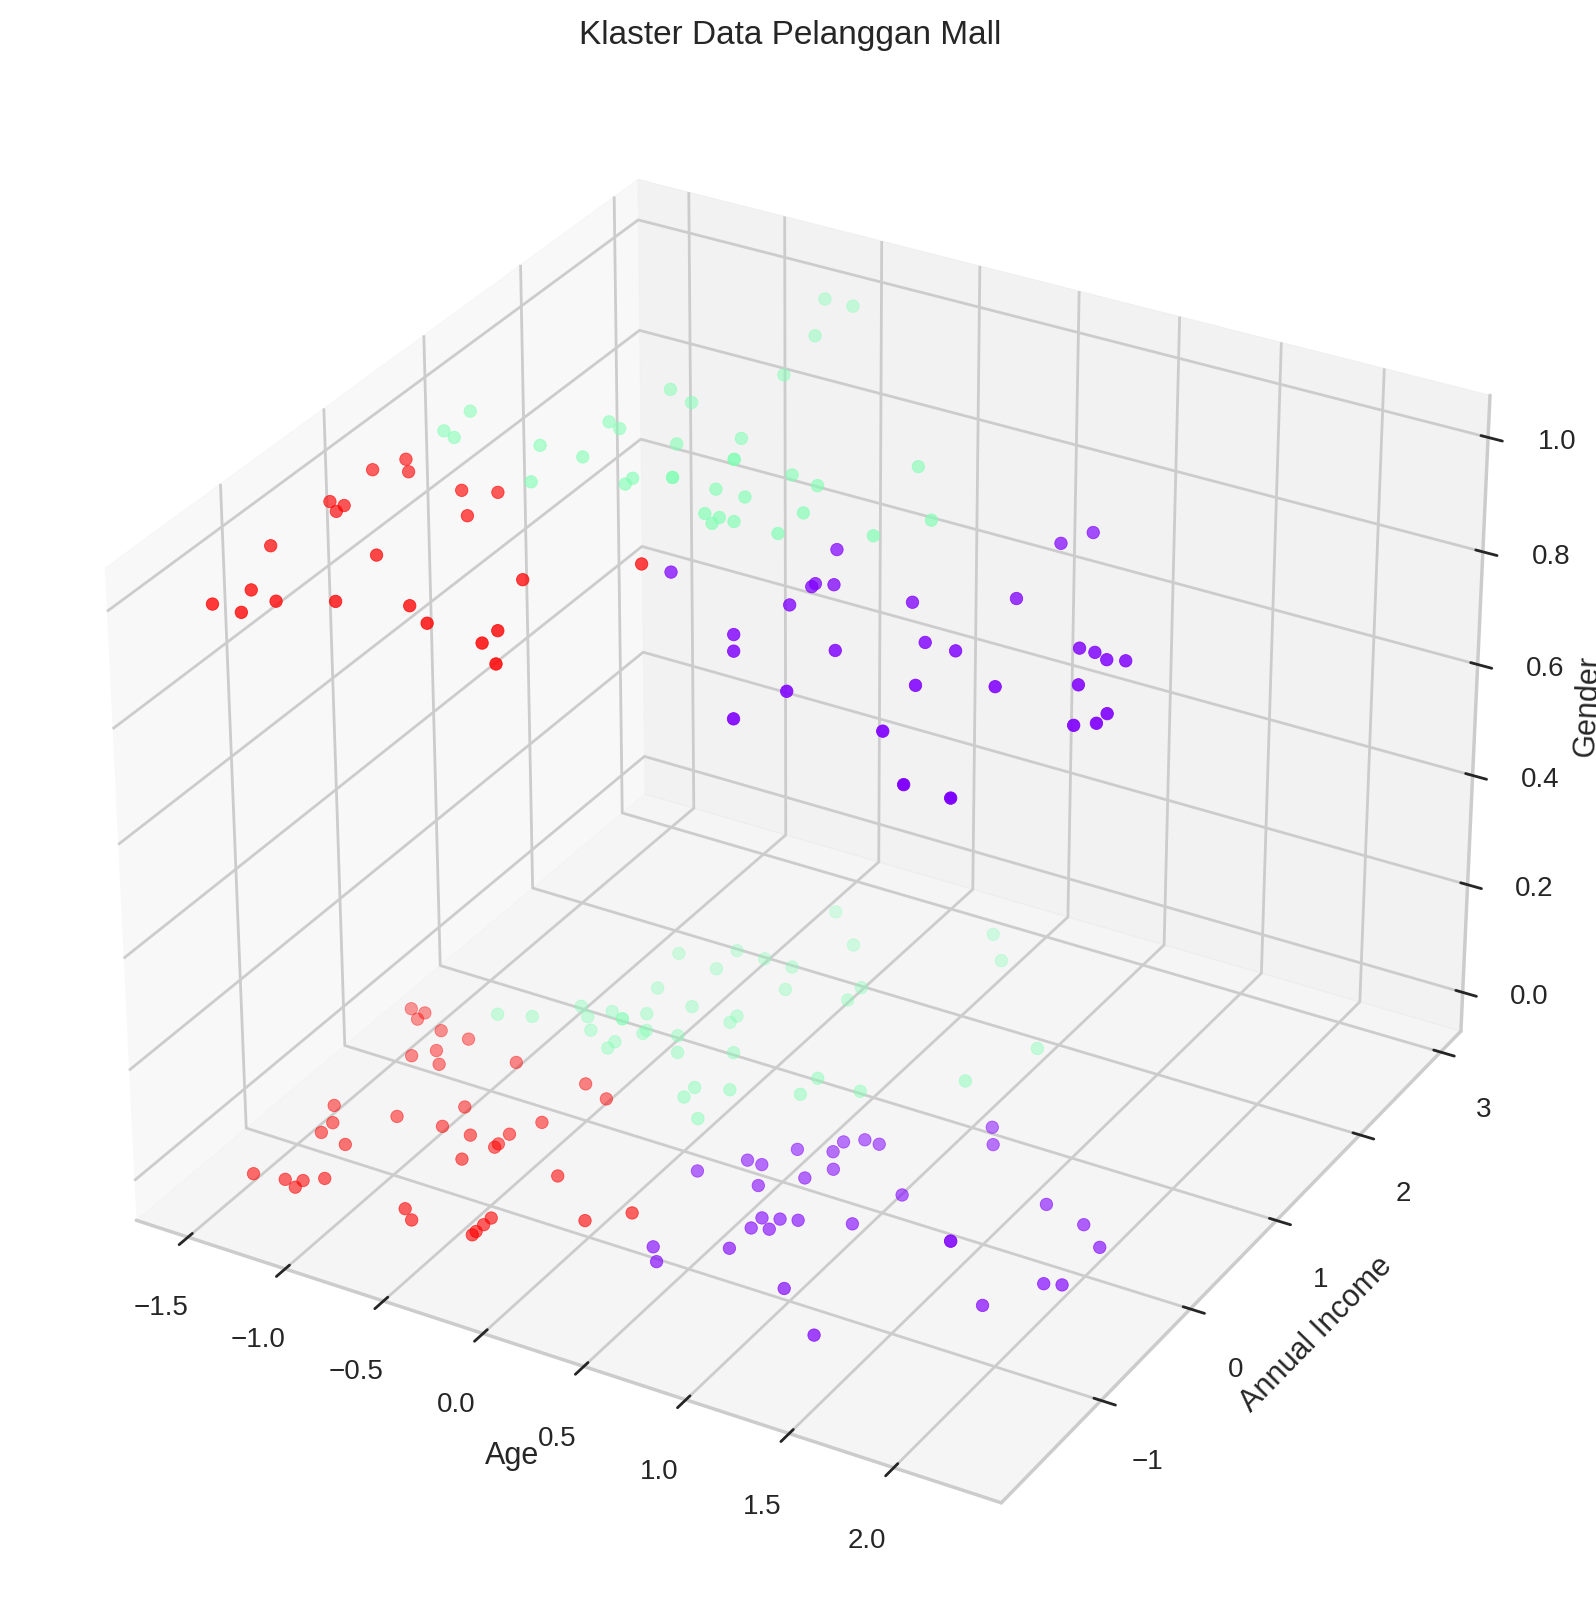

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['Age']
y = df_with_clusters['Annual Income (k$)']
z = df_with_clusters['Gender']
cluster = df_with_clusters['klaster']
 
# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Mall")
plt.grid(False)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Gender')

plt.show()

**Contoh interpretasi**: berdasarkan fitur yang digunakan (`Age`, `Annual Income`, dan `Gender`), ditemukan tiga segmen (klaster) pelanggan mall, sebut saja klaster ungu, merah, dan hijau sesuai warna pada visualisasi di atas. Berikut adalah beberapa *insights* bisa diambil:

1. Klaster ungu terdiri atas pelanggan yang lebih dewasa secara usia dan penghasilan yang mirip dengan klaster hijau.
2. Klaster merah terdiri atas pelanggan yang lebih muda dari klaster ungu dan penghasilannya cenderung lebih tinggi dari kedua klaster lain.
3. Klaster hijau terdiri atas pelanggan dengan usia paling muda (relatif terhadap klaster lainnya) dan penghasilannya cenderung sama dengan anggota klaster ungu.

## **Hierarchical (Agglomerative) Clustering**

*Hierarchical Clustering* adalah kelompok algoritma *clustering* yang bertujuan untuk menemukan klaster dengan hubungan hierarkis (ada tingkatannya). Setidaknya ada dua jenisnya, yaitu Agglomerative dan Divisive. Pada Agglomerative, proses dimulai dari *individual data points*, kemudian di-*merge* hingga nantinya terbentuk 1 klaster yang terdiri atas semua *data points*. Hal yang sebaliknya dilakukan pada Divisive. Namun, pada lab ini, kita akan berfokus pada yang Agglomerative. Seperti yang dipelajari di kelas, tahapan dari Agglomerative *clustering* tergolong sederhana juga, yakni:

1. Pada kondisi awal, tiap *data points* memiliki klaster masing-masing.
2. Cari pasangan klaster yang **terdekat**, lalu *merge* menjadi klaster gabungan keduanya.
3. Lakukan *merge* hingga memenuhi kriteria tertentu (atau bisa hingga tersisa 1 klaster saja yang berisi semua *data points*). Proses pembentukannya bisa divisualisasikan sebagai suatu dendogram.

Yang menjadi catatan adalah cara mengukur kedekatan antara dua klaster. Saat kondisi awal, pengukuran jarak tentunya trivial (cukup ukur jarak dua *data points* menggunakan misalnya *euclidian distance*). Namun, bagaimana jika klasternya sudah berisi lebih dari satu *data points*? Ada berbagai cara (yang direpresentasikan dengan _hyperparameter_ _linkage_ di Scikit-Learn). Untuk melihat komparasi keempatnya pada *dataset* dengan bentuk bermacam-macam, silakan merujuk ke [sini](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html).

Selanjutnya kita akan membuat model `sklearn.cluster.AgglomerativeClustering` menggunakan data yang sama dengan yang kita gunakan pada model K-Means.

### **Persiapan Clustering**

Sebelum membuat model yang akan digunakan untuk memprediksi klaster dari data, kita akan mencari tahu berpakah jumlah klaster yang optimal berdasarkan visualisasi dendogram (tidak perlu dispesifikasikan sejak awal jumlahnya seperti K-Means). Caranya adalah dengan mencari garis vertikal terpanjang yang menunjukkan bahwa klaster yang terbentuk sudah terpisah dengan baik.

In [ ]:
# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)  
cluster_assignment = agglomerative.fit(df_std)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([155, 148, 106, 185, 168, 174, 192, 167, 122, 101, 173, 121, 179,
       133, 102, 147, 184, 100, 181, 126, 145, 163, 158, 132, 169, 146,
       131, 143, 116, 127, 117, 165, 149, 153, 166, 130, 197, 199,  73,
       104, 156, 151, 136, 194, 176, 157, 112, 152, 134, 110, 162, 107,
       144, 186, 178,  65, 189, 170, 108, 137, 183, 172, 180, 177, 113,
       188, 195, 103, 118, 159,  66, 114,  99,  53, 154,  83,  92,  76,
        78, 139,  49, 171, 164, 187, 160, 196, 140,  69,  71,  50, 124,
       128,  97, 193, 125, 142, 120, 141,  85,  79, 150,  81,  89, 105,
        82,  74, 191,  75,  72, 190, 111,  84,  40, 119,  93,  86, 182,
        95,  96, 161,  51,  52,  59,  42,  70,  91,  55,  94, 115,  80,
        56,  35,  39, 129, 175,  32,  64,  90,  19, 138,  68,  63,  41,
        47, 123,  60,  31,  25,  46, 198,  27,  37,  15,  87, 109,  45,
       135,  98,  77,  57,  38,  20,  48,  67,  61,  44,  36,  58,  62,
        22,  18,  88,  23,  54,  33,  43,  30,  24,   9,  26,  2

In [ ]:
# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

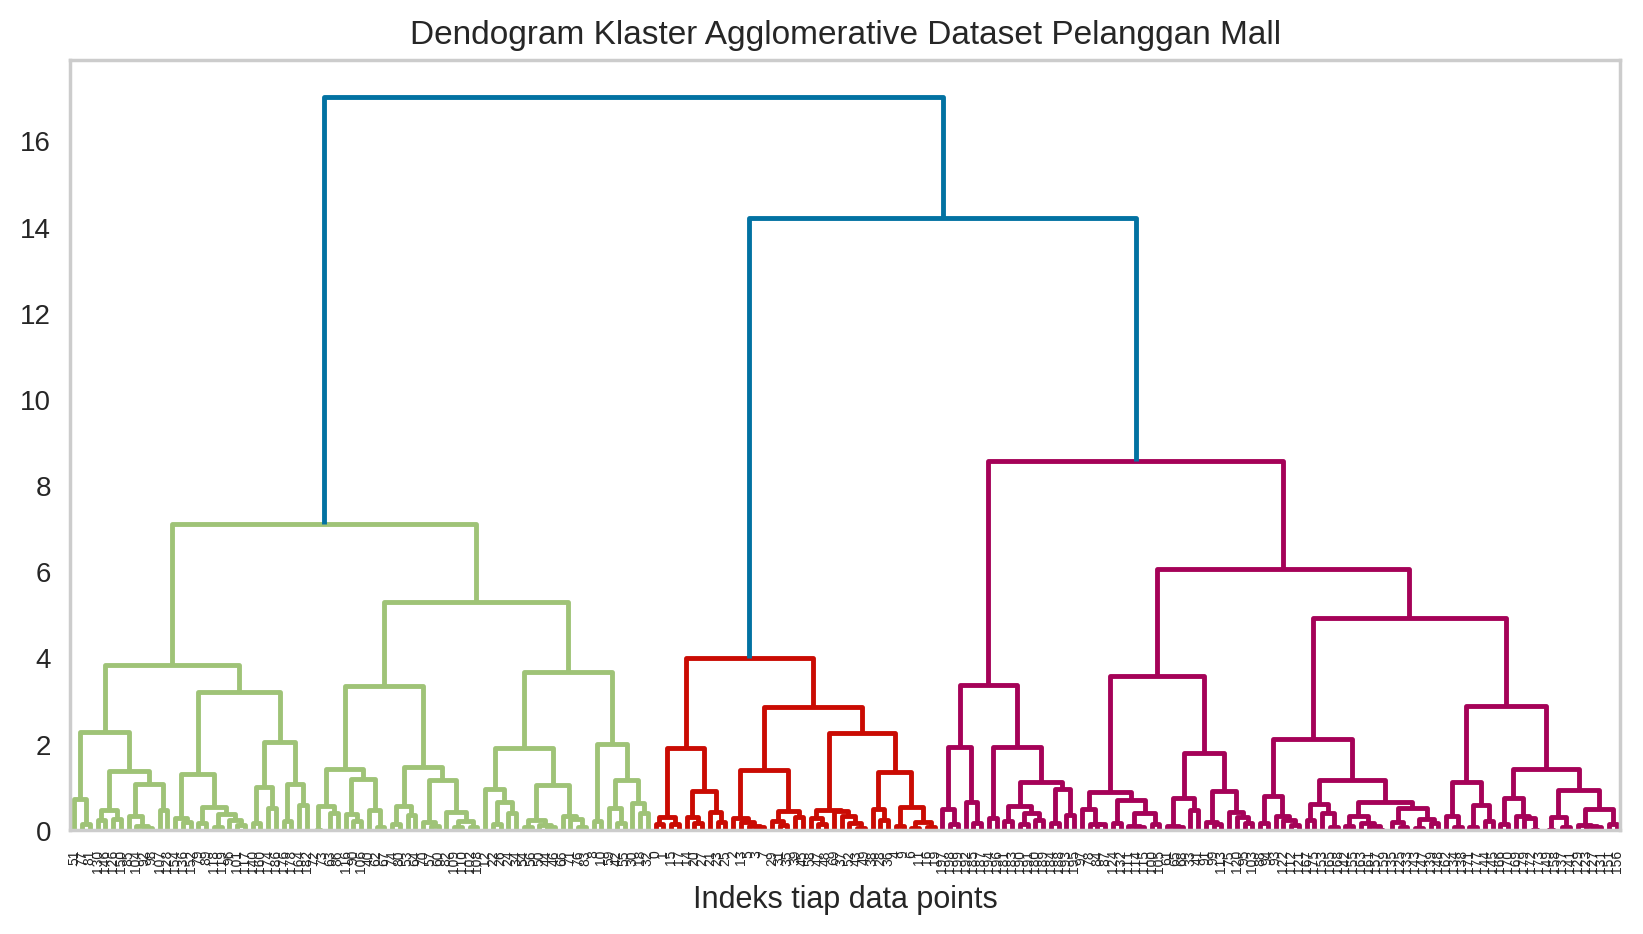

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.show()

> Berdasarkan dendogram di atas, garis biru kedua dari atas memiliki garis vertikal terpanjang (artinya pemisahan antara klaster yang terbentuk paling baik) sehingga bisa dipilih sebagai ambang batas aglomerasi. Dengan demikian, jumlah klaster yang terbentuk adalah 3 seperti hasil K-Means.

Selanjutnya, akan ditunjukkan visualisasi yang sama, tetapi dengan ambang batas aglomerasinya juga ditampilkan.

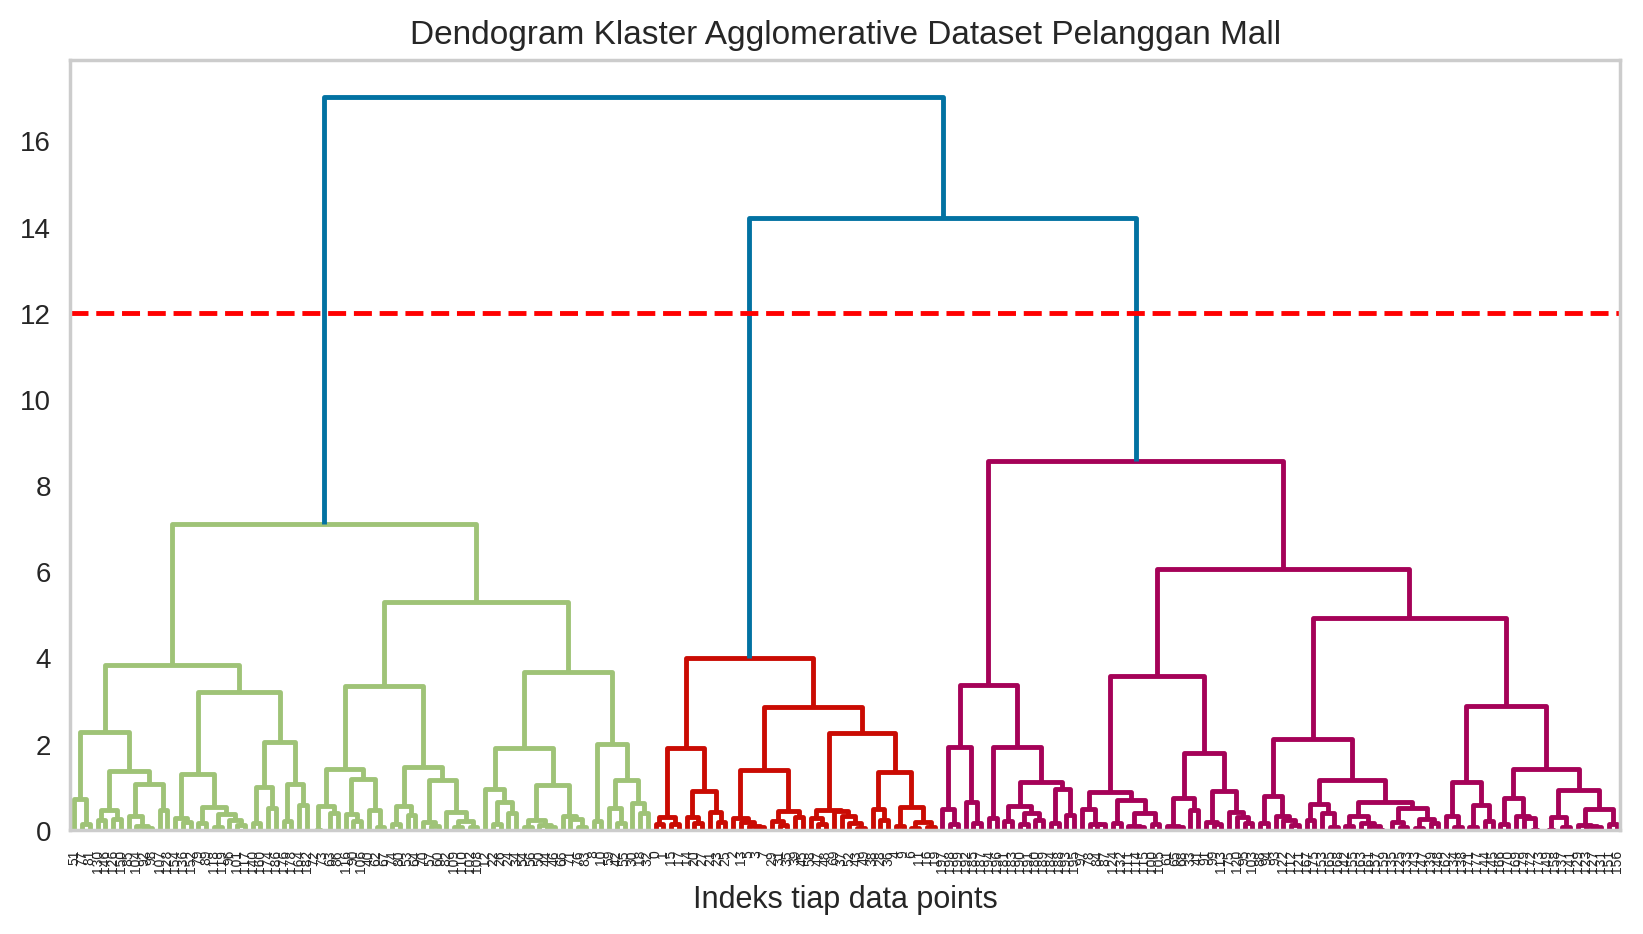

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 12, color = 'red', linestyle = 'dashed')
plt.show()

### Membuat Model dan Melakukan Prediksi

In [ ]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=3)
cluster_assignment = agglomerative.fit_predict(df_std)

In [ ]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_std.copy())
df_with_clusters['klaster'] = cluster_assignment 
df_with_clusters.head()

,Age,Annual Income (k$),Gender,klaster
0,-1.424569,-1.738999,1,2
1,-1.281035,-1.738999,1,2
2,-1.352802,-1.700830,0,2
3,-1.137502,-1.700830,0,2
4,-0.563369,-1.662660,0,2


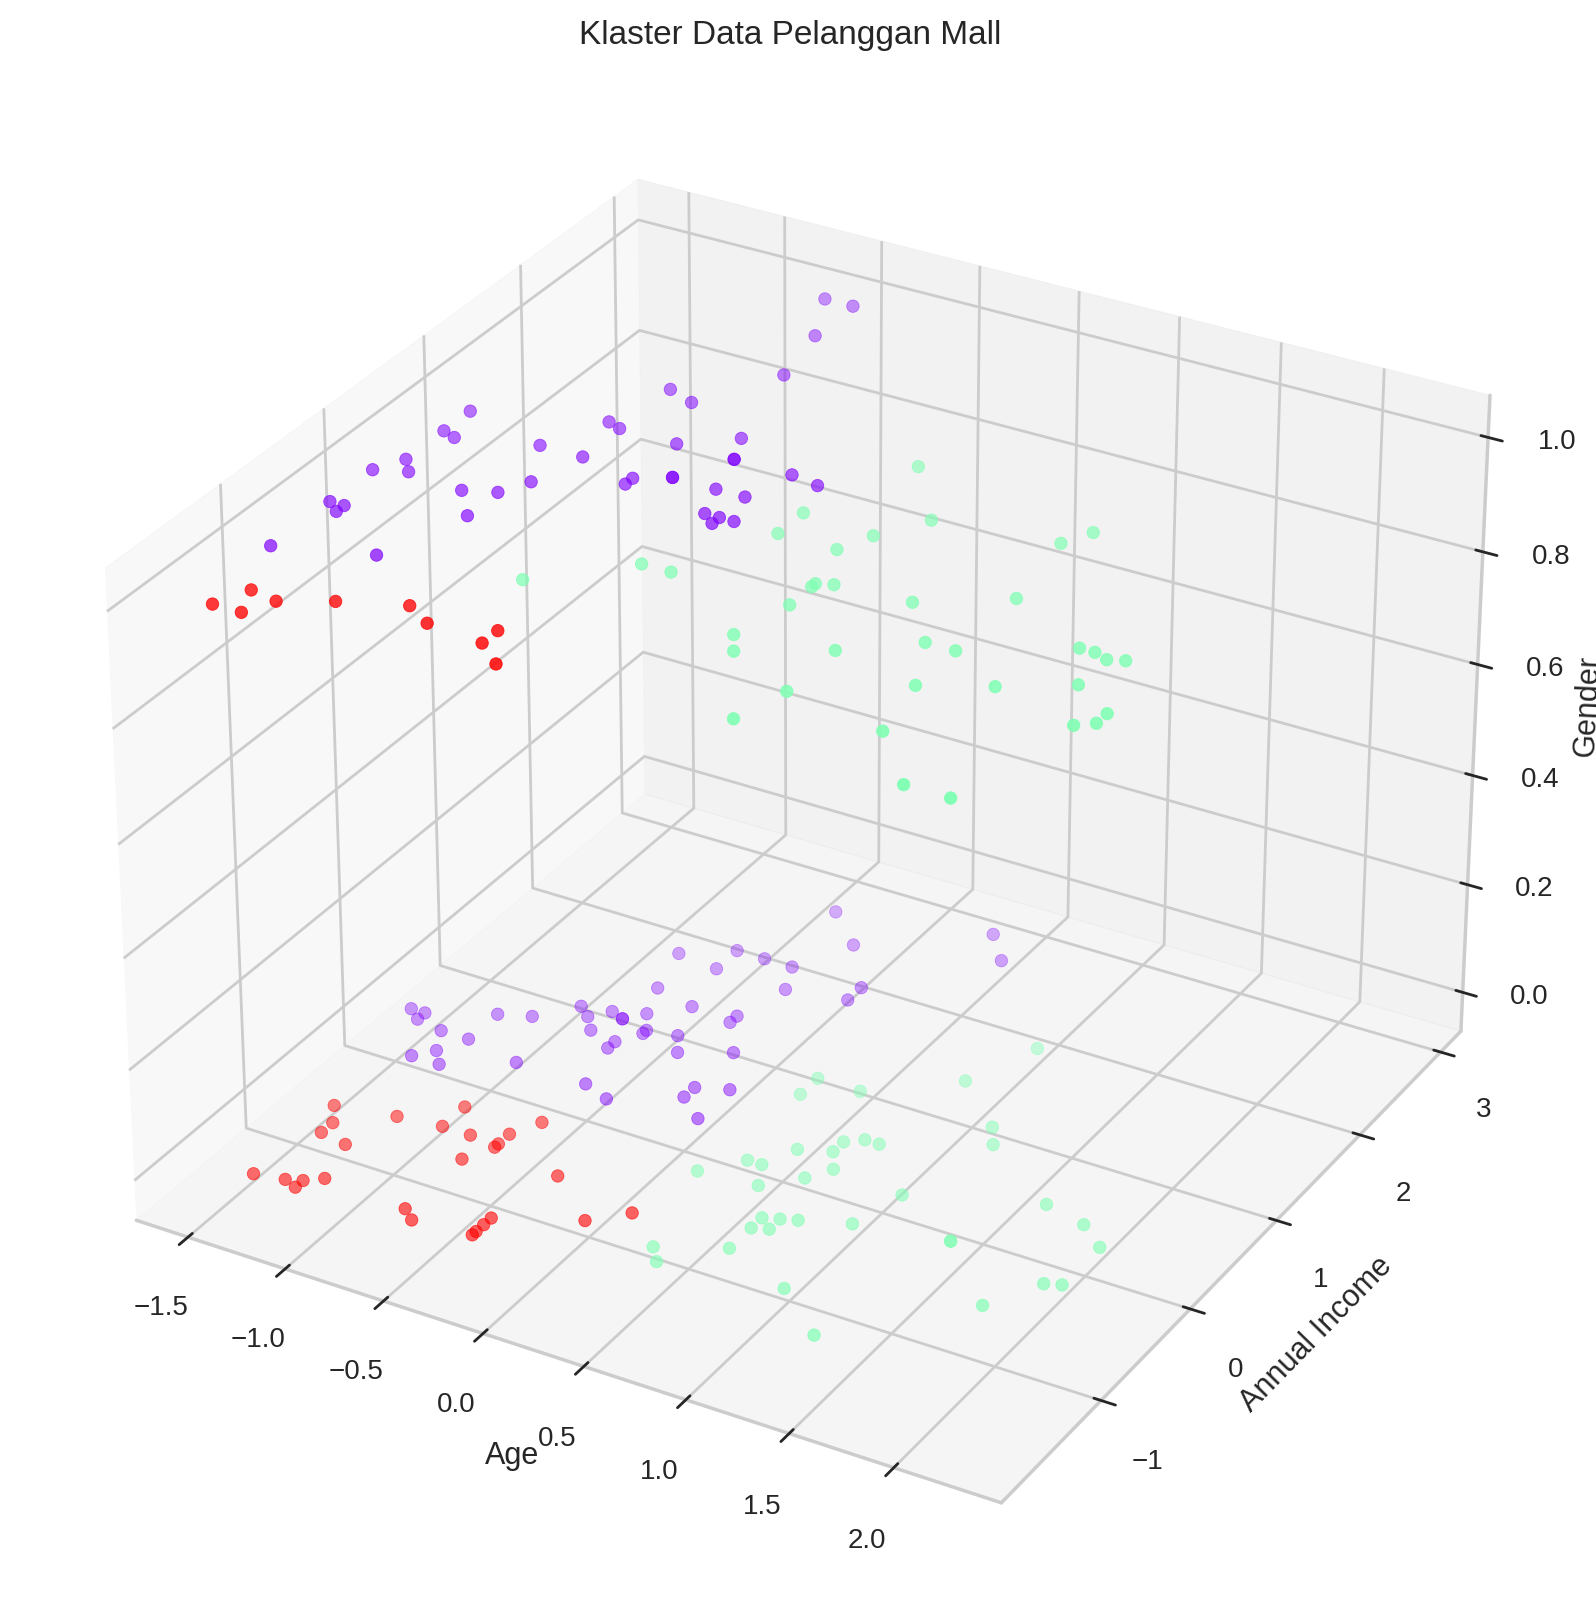

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['Age']
y = df_with_clusters['Annual Income (k$)']
z = df_with_clusters['Gender']
cluster = df_with_clusters['klaster']
 
# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Mall")
plt.grid(False)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Gender')

plt.show()

> Jika dikomparasikan dengan hasil K-Means, klaster yang diberikan pada pelanggan cukup berbeda (khususnya pria) di mana klaster merah (posisinya ekuivalen dengan klaster hijau di visualisasi K-Means) jumlahnya jauh lebih sedikit dan banyak di-assign sebagai bagian dari klaster ungu.

# **Tugas Lab**

## **Pertanyaan Kode [70 poin]**

Untuk pertanyaan kode, Anda diminta untuk melakukan _clustering_ pada dataset `data_pelanggan_supermarket.csv` untuk melakukan segmentasi pelanggan (kurang lebih permasalahannya mirip dengan pada contoh, tetapi kali ini konteksnya adalah supermarket). Anda akan menerapkan dua metode _clustering_ seperti yang dibahas di bagian Materi Clustering, yaitu K-Means dan Agglomerative. Berikut adalah penjelasan tiap atributnya.

**Penjelasan Dataset**

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| id                   | ID pelanggan                              |
| education             | Tingkat pendidikan terakhir                |
| marital_status | Status pernikahan |
| income               | Pendapatan tahunan (USD)        |
| num_kid               | Jumlah anak di rumah        |
| num_teen               | Jumlah remaja di rumah        |
| days_last_purchases  | Jumlah hari sejak terakhir belanja        |
| total_juice_expenses | Pengeluaran untuk buah sejauh ini (USD)   |
| total_fruit_expenses | Pengeluaran untuk buah sejauh ini (USD)   |
| total_meat_expenses  | Pengeluaran untuk daging sejauh ini (USD) |
| total_fish_expenses  | Pengeluaran untuk ikan sejauh ini (USD)   |
| total_sweet_expenses  | Pengeluaran untuk manisan sejauh ini (USD)   |
| num_deal_purchases    | Jumlah pembelian saat diskon              |
| num_web_purchases    | Jumlah pembelian melalui web              |
| num_catalog_purchases    | Jumlah pembelian melalui katalog              |
| num_store_purchases  | Jumlah pembelian melalui toko offline     |
| num_web_visits_per_month  | Jumlah mengunjungi web perbulan     |

> Dataset merupakan adaptasi dan modifikasi dari https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [ ]:
# Load dataset
df = pd.read_csv('data_pelanggan_supermarket.csv')
df.drop('id', axis=1, inplace=True)  # drop id karena tidak diperlukan
df.head()

,education,marital_status,income,num_kid,num_teen,days_last_purchases,total_juice_expenses,total_fruit_expenses,total_meat_expenses,total_fish_expenses,total_sweet_expenses,num_deal_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_per_month
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,3,8,10,4,7
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,2,1,1,2,5
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,1,8,2,10,4
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,2,2,0,4,6
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,5,5,3,6,5


In [ ]:
print(f"Ukuran dataset: {df.shape}")

Ukuran dataset: (500, 16)


### Eksplorasi Data

Setelah me-load dataset, hal pertama yang dilakukan adalah melakukan **eksplorasi** untuk lebih memahami tiap atribut.

In [ ]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   education                 500 non-null    object 
 1   marital_status            500 non-null    object 
 2   income                    487 non-null    float64
 3   num_kid                   500 non-null    int64  
 4   num_teen                  500 non-null    int64  
 5   days_last_purchases       500 non-null    int64  
 6   total_juice_expenses      500 non-null    int64  
 7   total_fruit_expenses      500 non-null    int64  
 8   total_meat_expenses       500 non-null    int64  
 9   total_fish_expenses       500 non-null    int64  
 10  total_sweet_expenses      500 non-null    int64  
 11  num_deal_purchases        500 non-null    int64  
 12  num_web_purchases         500 non-null    int64  
 13  num_catalog_purchases     500 non-null    int64  
 14  num_store_

In [ ]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,income,num_kid,num_teen,days_last_purchases,total_juice_expenses,total_fruit_expenses,total_meat_expenses,total_fish_expenses,total_sweet_expenses,num_deal_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_per_month
count,487.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,51400.735113,0.488000,0.468000,48.15000,298.02000,23.526000,161.714000,37.03800,27.032000,2.336000,3.946000,2.66800,5.800000,5.356000
std,21528.074746,0.564352,0.560003,29.10088,330.69558,38.384007,226.980485,55.26051,42.440893,2.018726,2.819038,3.10113,3.306034,2.380041
min,2447.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33787.000000,0.000000,0.000000,23.00000,18.00000,1.000000,14.000000,2.00000,1.000000,1.000000,2.000000,0.00000,3.000000,3.000000
50%,50898.000000,0.000000,0.000000,47.00000,163.50000,6.000000,61.500000,11.00000,8.000000,2.000000,3.000000,1.00000,5.000000,6.000000
75%,67795.500000,1.000000,1.000000,74.00000,509.25000,26.000000,221.750000,43.25000,32.000000,3.000000,6.000000,4.00000,8.000000,7.000000
max,157243.000000,2.000000,2.000000,99.00000,1396.00000,194.000000,1725.000000,254.00000,263.000000,15.000000,27.000000,28.00000,13.000000,20.000000


### _Pre-processing_ Data [20 poin]

Setelah melakukan eksplorasi, hal selanjutnya yang perlu dilakukan adalah _pre-processing_ dari data agar siap digunakan untuk _task_ lebih lanjut (dalam hal ini adalah _clustering_). Seperti yang dijelaskan di bagian persiapan _clustering_, hal minimal yang harus dilakukan adalah _Handle_ _missing value_, _Handle outliers_, standarisasi, dan _encoding_ atribut kategorikal.

#### Soal 1 [6 poin]

**Cek** keberadaan _missing value_. Jika ada, **tangani** dan **berikan alasan** menggunakan penanganan tersebut (cantumkan juga referensinya jika ada).

In [ ]:
# TODO: penanganan

def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])
    
    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,education,object,0,0.0,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
1,marital_status,object,0,0.0,6,"[Single, Together, Married, Divorced, Widow, A..."
2,income,float64,13,2.6,467,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
3,num_kid,int64,0,0.0,3,"[0, 1, 2]"
4,num_teen,int64,0,0.0,3,"[0, 1, 2]"
5,days_last_purchases,int64,0,0.0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
6,total_juice_expenses,int64,0,0.0,301,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."
7,total_fruit_expenses,int64,0,0.0,99,"[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2..."
8,total_meat_expenses,int64,0,0.0,251,"[546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48..."
9,total_fish_expenses,int64,0,0.0,114,"[172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,..."


In [ ]:
print('Shape before cleaning ' + str(df.shape))

Shape before cleaning (500, 16)


In [ ]:
df.dropna(how = "any", axis = 0, inplace=True)

In [ ]:
print('Shape after cleaning ' + str(df.shape))

Shape after cleaning (487, 16)


TODO: Alasan penanganan

Saya melakukan drop pada nilai yang null karena persentase nilai null sangat sedikit, yaitu di bawah 10% dari total data

> sumber: -

#### Soal 2 [6 poin]

**Cek** keberadaan _outliers_. Jika ada, **lakukan** penanganan yang sesuai dan **berikan alasannya** (cantumkan juga referensinya jika ada).

In [ ]:
# TODO: penanganan

cat_cols = df.select_dtypes(include=['object'])
print(cat_cols.columns)

Index(['education', 'marital_status'], dtype='object')


In [ ]:
num_cols = df.drop(cat_cols, axis=1)
print(num_cols.columns)

Index(['income', 'num_kid', 'num_teen', 'days_last_purchases',
       'total_juice_expenses', 'total_fruit_expenses', 'total_meat_expenses',
       'total_fish_expenses', 'total_sweet_expenses', 'num_deal_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'num_web_visits_per_month'],
      dtype='object')


In [ ]:
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3-Q1

Jumlah_Outlier = []

for col in num_cols.columns:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([
        col, 
        outliers, 
        outliers/len(df)*100,
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()])
    
indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','OutlierPct', 'min', 'Q1', 'Q2', 'Q3', 'max'],index=indexOutput).sort_values(by=['OutlierPct'], ascending = False,ignore_index=True)

,Column,Outlier,OutlierPct,min,Q1,Q2,Q3,max
0,total_fruit_expenses,61,12.525667,0.0,1.0,6.0,26.0,194.0
1,total_fish_expenses,60,12.320329,0.0,2.0,11.0,43.0,254.0
2,total_sweet_expenses,57,11.704312,0.0,1.0,8.0,31.0,194.0
3,total_meat_expenses,36,7.392197,1.0,14.0,63.0,227.0,1725.0
4,num_deal_purchases,20,4.106776,0.0,1.0,2.0,3.0,15.0
5,total_juice_expenses,4,0.821355,0.0,18.5,164.0,511.0,1396.0
6,num_catalog_purchases,4,0.821355,0.0,0.0,1.0,4.0,28.0
7,income,1,0.205339,2447.0,33787.0,50898.0,67795.5,157243.0
8,num_web_visits_per_month,1,0.205339,0.0,3.0,6.0,7.0,20.0
9,num_kid,0,0.000000,0.0,0.0,0.0,1.0,2.0


In [ ]:
print('Shape before cleaning ' + str(df.shape))

Shape before cleaning (487, 16)


In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)

In [ ]:
print('Shape before cleaning ' + str(df.shape))

Shape before cleaning (344, 16)


TODO: Alasan penanganan

Awalnya saya melakukan drop secara sementara, untuk mengecek apakah outlier yang dibuang mempengaruhi hasil clustering secara signifikan. Ketika melihat hasil tetap optimal, saya memutuskan untuk tetap mendrop data outlier tersebut.
> sumber: https://www.statology.org/remove-outliers/

#### Soal 3 [8 poin]

**Lakukan standarisasi** atribut numerik dan ***encoding*** atribut kategorikal dengan metode yang Anda rasa cocok (**sertakan alasan penggunaan metode tersebut** beserta referensinya jika ada).

In [ ]:
# TODO: penanganan
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['education'] = le.fit_transform(df['education'])
df['marital_status'] = le.fit_transform(df['marital_status'])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

num_cols = df.select_dtypes(include=['float64', 'int64'])
df[num_cols.columns] = scaler.fit_transform(df[num_cols.columns])

In [ ]:
df.head()

,education,marital_status,income,num_kid,num_teen,days_last_purchases,total_juice_expenses,total_fruit_expenses,total_meat_expenses,total_fish_expenses,total_sweet_expenses,num_deal_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_per_month
0,0.50,0.6,0.411178,0.5,0.5,0.383838,0.008814,0.016667,0.009276,0.019231,0.013699,0.4,0.090909,0.111111,0.000000,0.444444
1,0.50,0.8,0.202668,0.5,0.0,0.262626,0.008814,0.066667,0.035250,0.096154,0.041096,0.4,0.181818,0.000000,0.181818,0.555556
2,1.00,0.4,0.537663,0.5,0.0,0.949495,0.138622,0.716667,0.217069,0.442308,0.369863,1.0,0.454545,0.333333,0.363636,0.444444
3,0.75,0.8,0.582333,0.0,0.5,0.161616,0.416667,0.700000,0.179963,0.000000,0.575342,0.4,0.545455,0.444444,0.727273,0.555556
4,1.00,0.4,0.274733,0.5,0.0,0.323232,0.060897,0.166667,0.102041,0.028846,0.013699,0.4,0.363636,0.000000,0.181818,0.777778


TODO: Alasan penanganan

Encoding dilakukan karena kmeans hanya dapat menerima data numerik, sehingga data kategorikal perlu diubah menjadai data numerik terlebih dahulu.

Scaling dilakukan karena kmeans memperhatikan jarak antar data, sehingga akan lebih baik untuk discaling terlebih dahulu.

> sumber: jika ada

### K-Means _Clustering_ [25 poin]

Untuk K-Means, hal pertama yang dilakukan adalah mencari tahu nilai k berapa yang paling optimal. Sebelumnya, **pilih tiga fitur**, **dua numerik** dan **satu kategorikal** pada data yang sudah Anda *preprocess* di bagian sebelumnya. Kemudian, gunakan ketiga fitur tersebut untuk melakukan *clustering*.

In [ ]:
# TODO: subsitusi menjadi fitur yang anda pilih pada kode berikut:
df_clustering = df[['total_juice_expenses', 'income', 'education']]
df_clustering.head()

,total_juice_expenses,income,education
0,0.008814,0.411178,0.50
1,0.008814,0.202668,0.50
2,0.138622,0.537663,1.00
3,0.416667,0.582333,0.75
4,0.060897,0.274733,1.00


#### Soal 1 [5 poin]

**Hitung nilai Silhouette Coefficient** untuk kedua fitur yang sudah dipilih. Gunakan rentang nilai k yang sesuai menurut **intuisi** Anda.

In [ ]:
def compute_silhouette_coef(df: pd.DataFrame, k_lower: int, k_upper: int):
    print("Komparasi silhouette coefficient untuk k berbeda:")
    print("=================================================")
    for k in [*range(k_lower, k_upper+1)]:
        # Mendefinisikan model K-Means dengan nilai k tertentu
        clusterer = KMeans(n_clusters = k)

        # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
        cluster_labels = clusterer.fit_predict(df_clustering)
        silhouette_avg = silhouette_score(df_clustering, cluster_labels)
        print(
            f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}"
        )

In [ ]:
compute_silhouette_coef(df_clustering, 2, 7)

Komparasi silhouette coefficient untuk k berbeda:
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.4230496431770996
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.4272685056125728
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.4554353094182284
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.4755523490821696
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.41831810484849136
Untuk k = 7, rata-rata silhouette_coefficient adalah: 0.421557842108532


#### Soal 2 [6 poin]

**Visualisasikan** **Silhouette Coefficient** untuk rentang nilai k pada soal sebelumnya dan berikan interpretasi hasilnya. Selain itu, tampilkan juga **visualisasi elbow method** (bisa dengan rentang nilai k yang berbeda) dan bandingkan hasilnya dengan Silhouette Coefficient. Terakhir, **pilih nilai k** yang optimal berdasarkan keduanya.

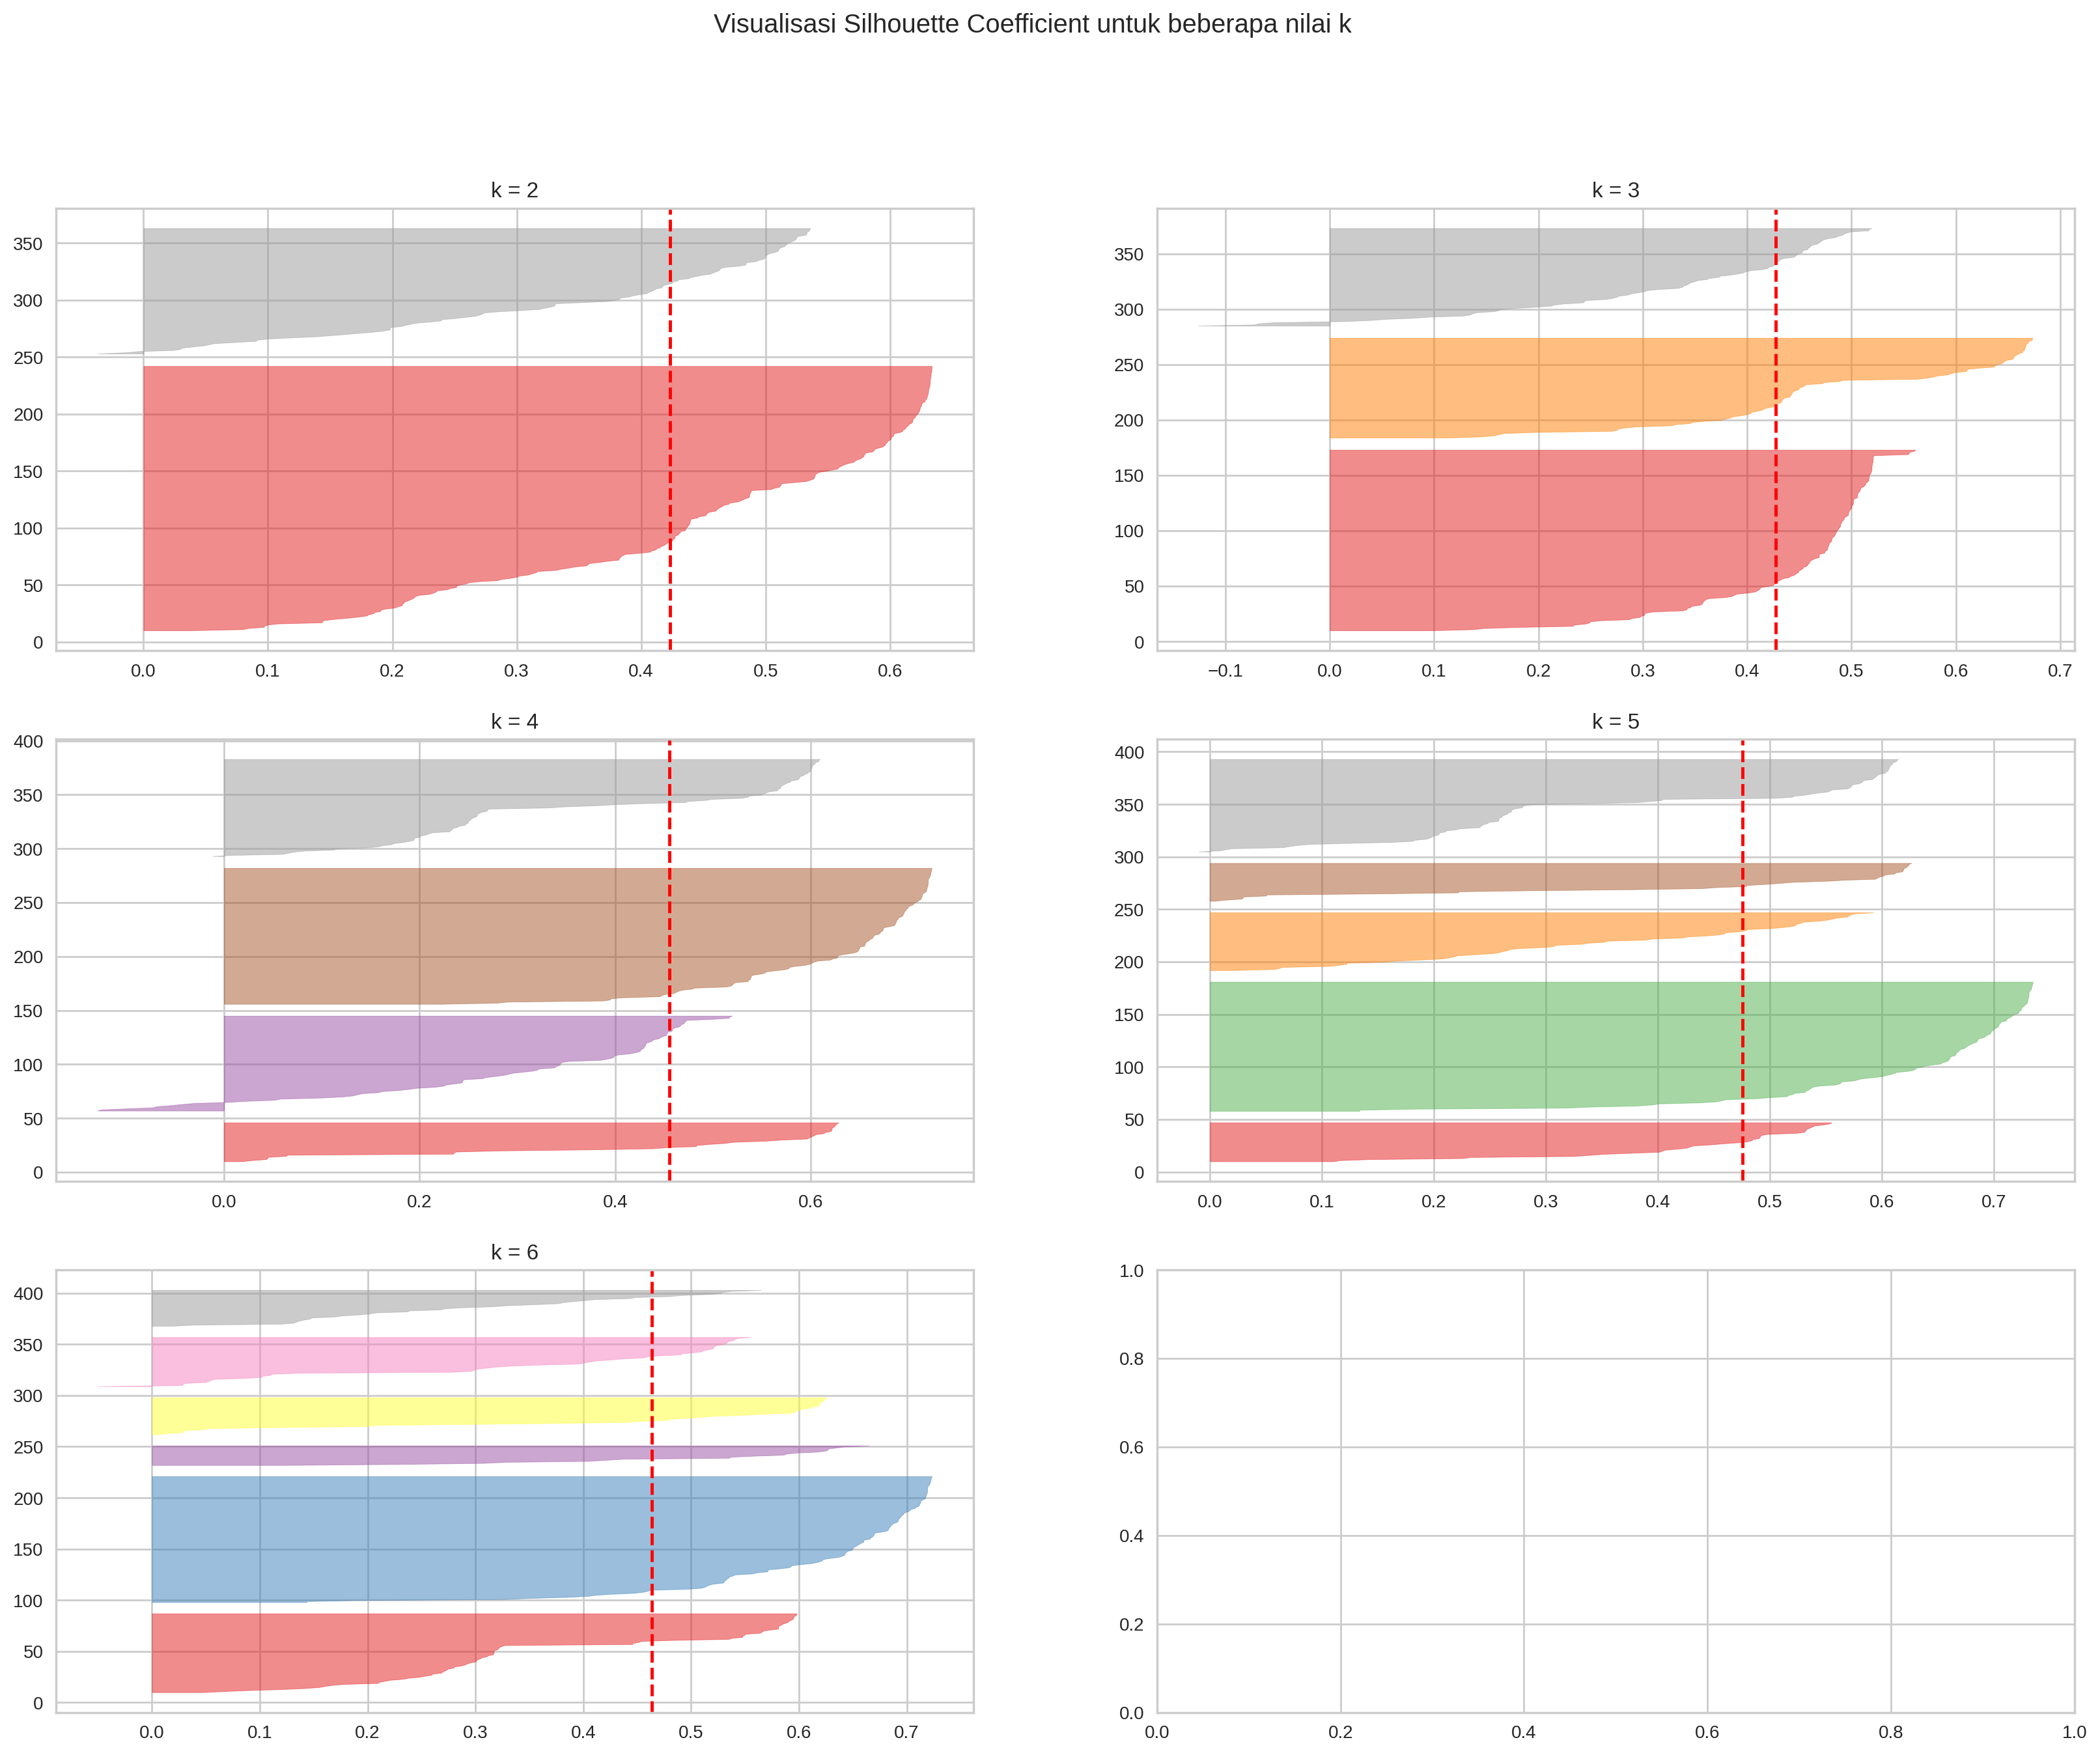

In [ ]:
# TODO: visualisasi silhouette

fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5, 6]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_clustering)

TODO: interpretasi

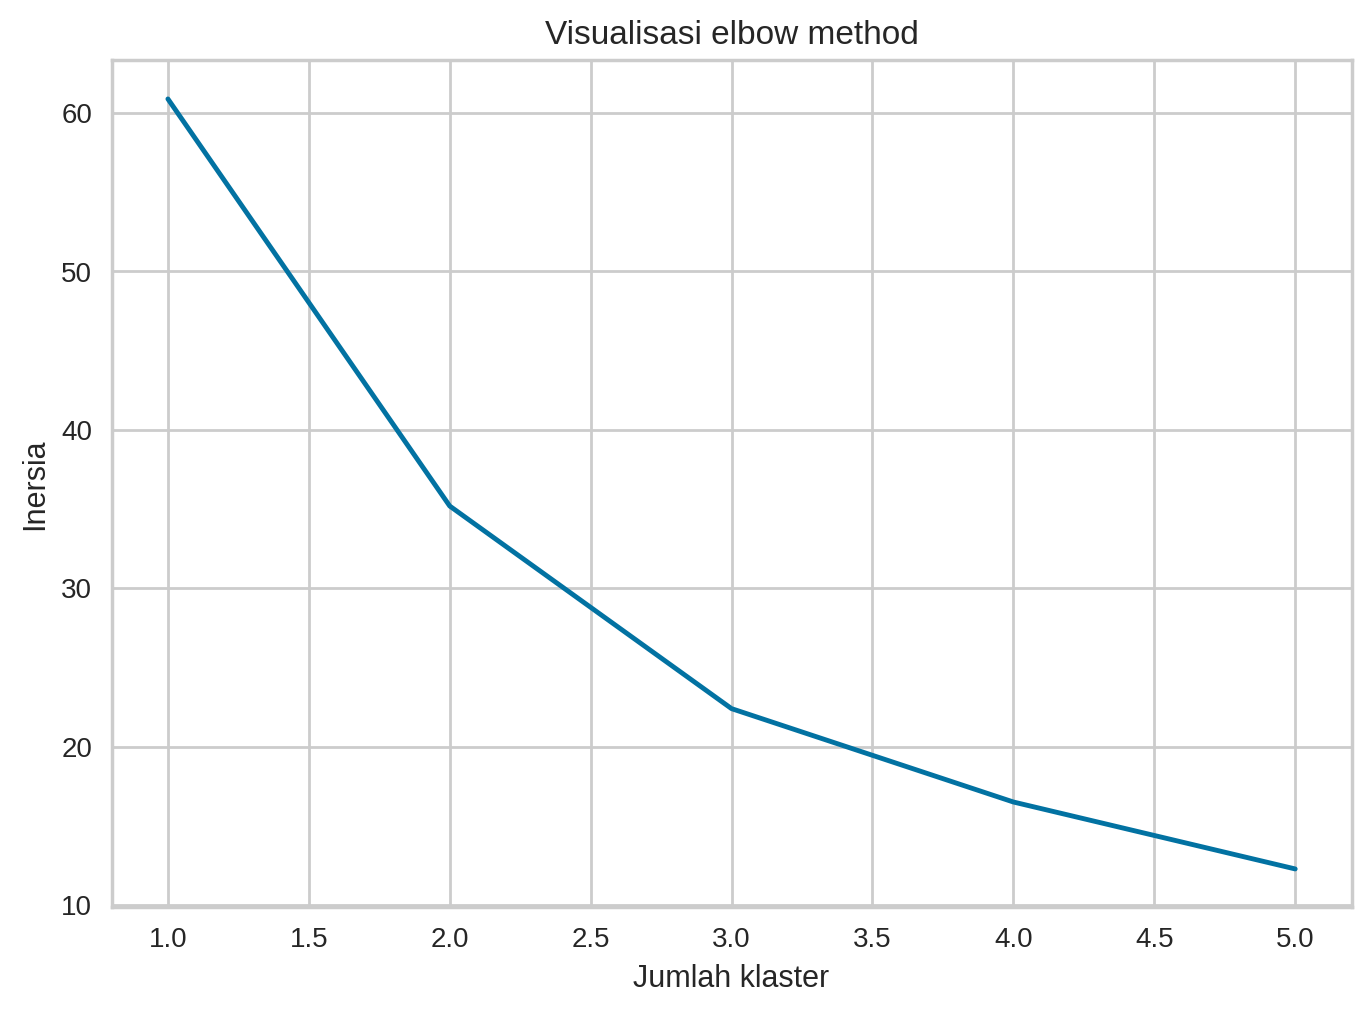

In [ ]:
# TODO: visualisasi elbow method

inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster)
    km = km.fit(df_clustering)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

TODO: bandingkan dengan silhouette dan pilih nilai k

#### Soal 3 [4 poin]

**Latih** model KMeans dengan nilai k yang sudah ditentukan sebelumnya.

In [ ]:
# TODO: latih model
kmeans = KMeans(n_clusters=5)
cluster_assignment = kmeans.fit_predict(df_clustering)
data_with_clusters = pd.DataFrame(df_clustering.copy())
data_with_clusters['Clusters'] = cluster_assignment

In [ ]:
data_with_clusters.head()

,total_juice_expenses,income,education,Clusters
0,0.008814,0.411178,0.50,0
1,0.008814,0.202668,0.50,0
2,0.138622,0.537663,1.00,2
3,0.416667,0.582333,0.75,4
4,0.060897,0.274733,1.00,2


#### Soal 4 [10 poin]

**Visualisasikan** hasil _clustering_ dan **berikan interpretasi** hasilnya.

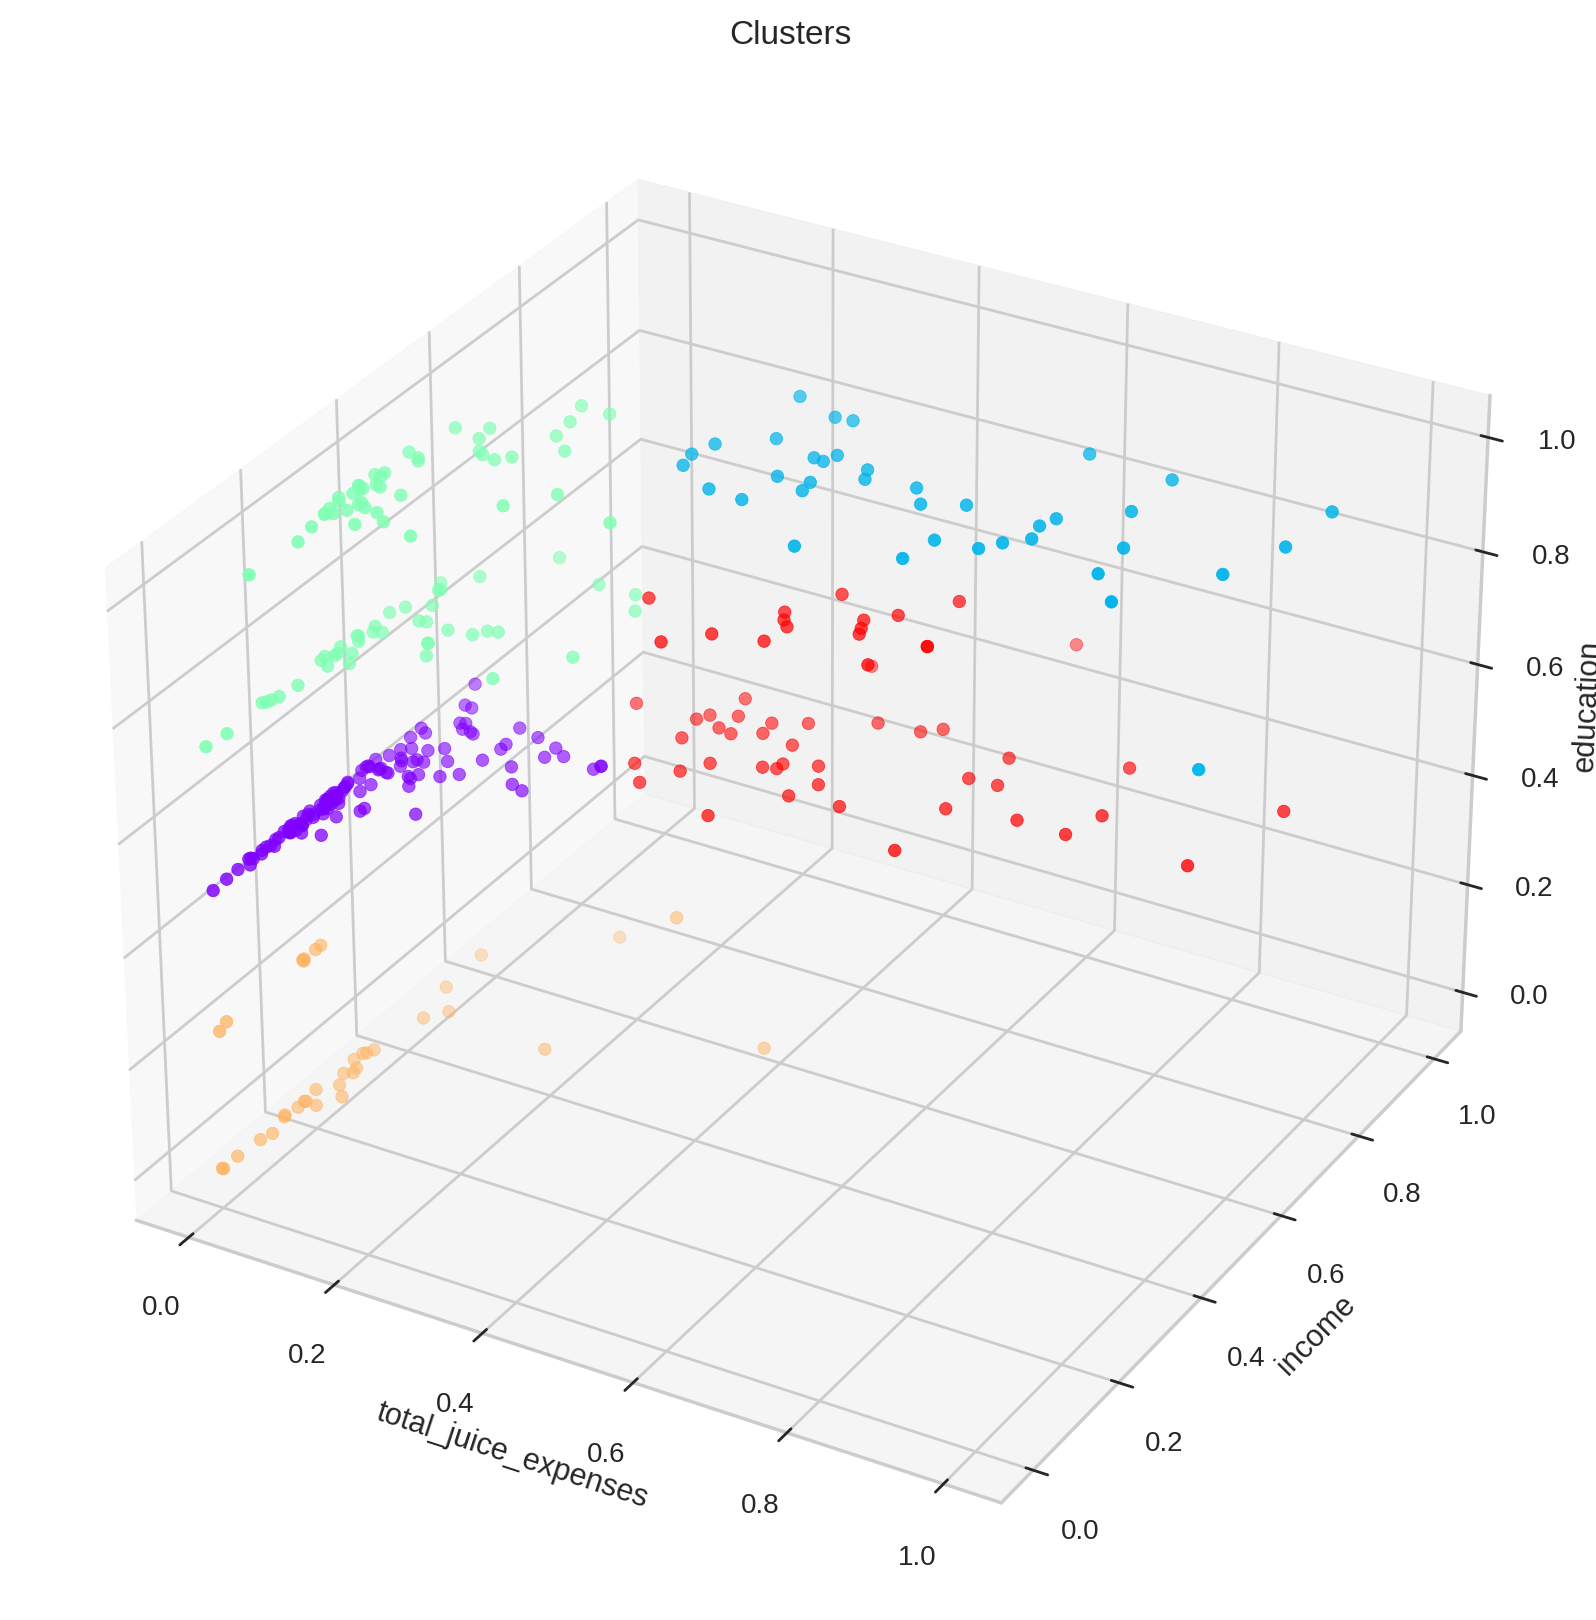

In [ ]:
# TODO: visualisasi
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Prepare data
x = data_with_clusters['total_juice_expenses']
y = data_with_clusters['income']
z = data_with_clusters['education']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clusters")
ax.set_xlabel('total_juice_expenses')
ax.set_ylabel('income')
ax.set_zlabel('education')

# Show plot
plt.show()

TODO: interpretasi hasil

### Agglomerative _Clustering_ [25 poin]

Kali ini, Anda harus melakukan _clustering_ dengan df_clustering juga, tetapi menggunakan algoritma Agglomerative.

#### Soal 1 [5 poin]

**Latih** model Agglomerative sementara untuk menentukan jumlah klaster yang sesuai.

In [ ]:
# TODO: latih model

# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)  
cluster_assignment = agglomerative.fit(df_clustering)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([201, 291, 333, 239, 204, 343, 212, 213, 282, 177, 298, 193, 192,
       187, 275, 306, 184, 326, 341, 342, 207, 320, 323, 328, 264, 216,
       334, 217, 332, 233, 311, 227, 297, 303, 279, 197, 256, 252, 293,
       270, 209, 312, 231, 179, 309, 284, 268, 221, 236, 315, 176, 258,
       148, 214, 335, 339, 316, 290, 338, 220, 180, 300, 322, 259, 304,
       235, 215, 331, 241, 240, 289, 319, 219, 269, 299, 283, 194, 245,
       208, 237, 242, 107, 255, 218, 151, 170, 206, 295, 171, 288, 324,
       274, 117, 232, 195, 317, 292, 263, 210, 257, 272, 276, 294, 205,
       128, 203, 104, 318, 302, 296, 190, 321, 286, 313, 337, 119, 230,
       186, 173, 267, 266, 200, 127, 287, 310, 247, 155, 301, 285, 253,
       229, 280, 305, 165, 223, 120, 222, 110, 260, 172, 314, 156, 228,
       224, 103, 243, 340, 191, 137, 254, 159, 249, 234, 273, 101, 189,
       277, 139, 244, 168, 145, 161, 196,  97, 265, 143, 169, 152, 114,
       329,  96, 108, 336, 136, 129, 166, 102, 261, 211, 132, 22

#### Soal 2 [8 poin]

**Visualisasikan** dendogram dari model Agglomerative sementara, lalu berikan **interpretasinya**.

In [ ]:
# TODO: visualisasi

# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

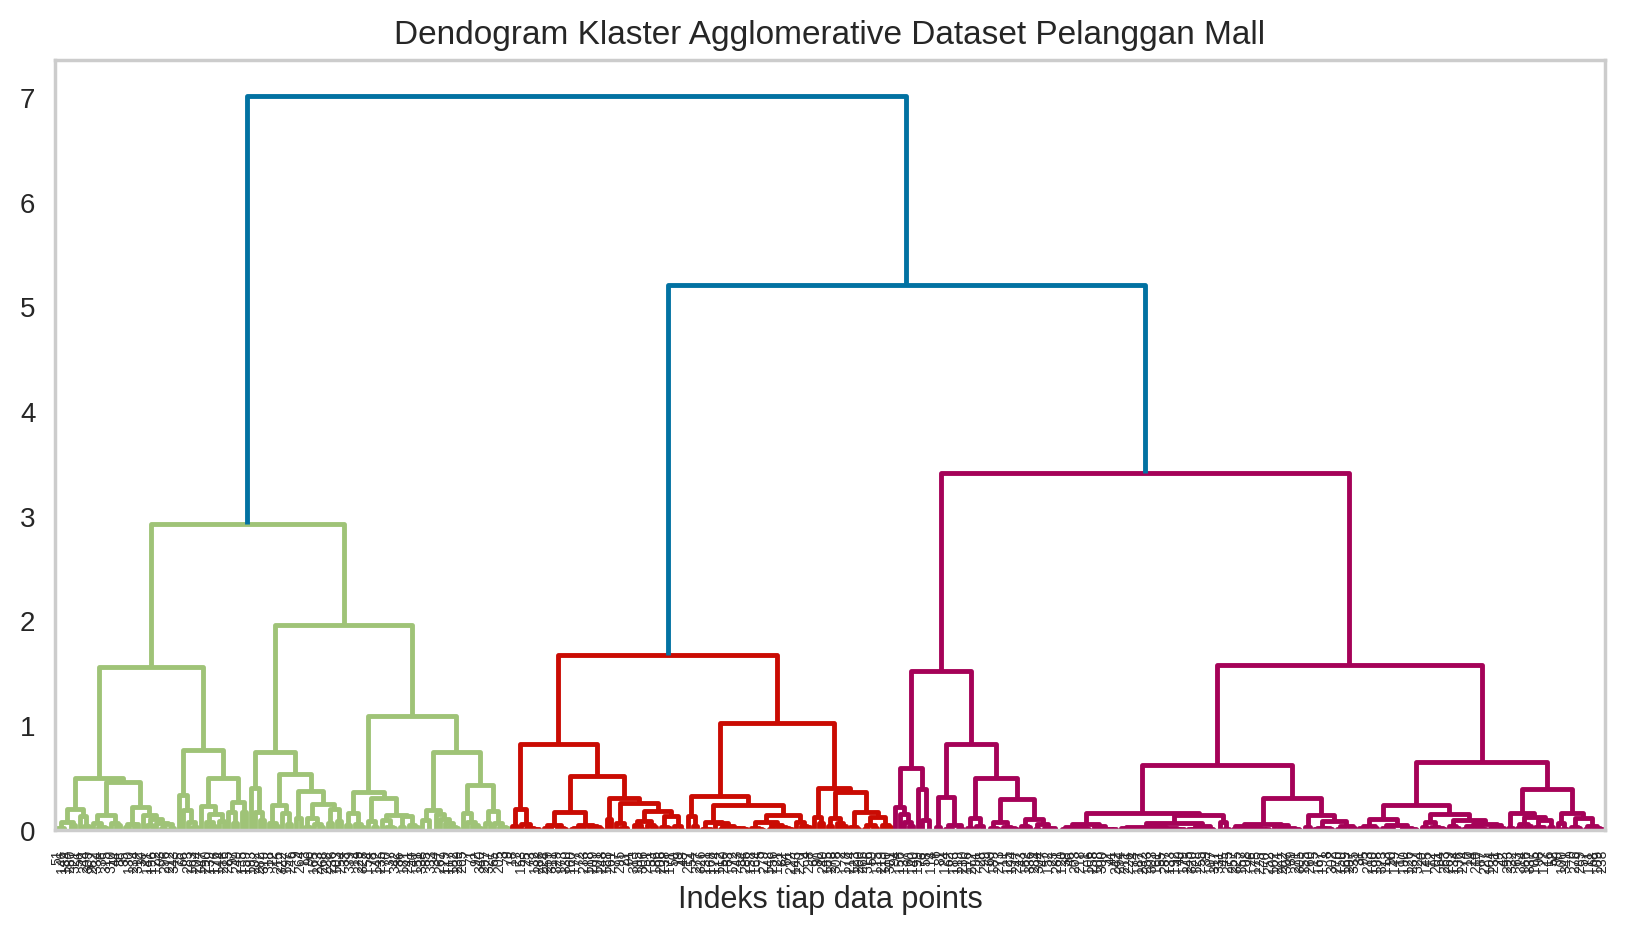

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 12, color = 'red', linestyle = 'dashed')
plt.show()

TODO: interpretasi hasil

#### Soal 3 [5 poin]

**Latih** model dengan jumlah klaster yang sudah ditentukan sebelumnya.

In [ ]:
# TODO: latih model sesuai jumlah klaster optimal
agglomerative = AgglomerativeClustering(n_clusters=5)
cluster_assignment = agglomerative.fit_predict(df_clustering)
df_with_clusters = pd.DataFrame(df_clustering.copy())
df_with_clusters['klaster'] = cluster_assignment 

In [ ]:
df_with_clusters.head()

,total_juice_expenses,income,education,klaster
0,0.008814,0.411178,0.50,1
1,0.008814,0.202668,0.50,1
2,0.138622,0.537663,1.00,2
3,0.416667,0.582333,0.75,0
4,0.060897,0.274733,1.00,2


#### Soal 4 [7 poin]

**Visualisasikan** hasilnya serta bandingkan hasilnya dengan visualisasi hasil _clustering_ K-Means.

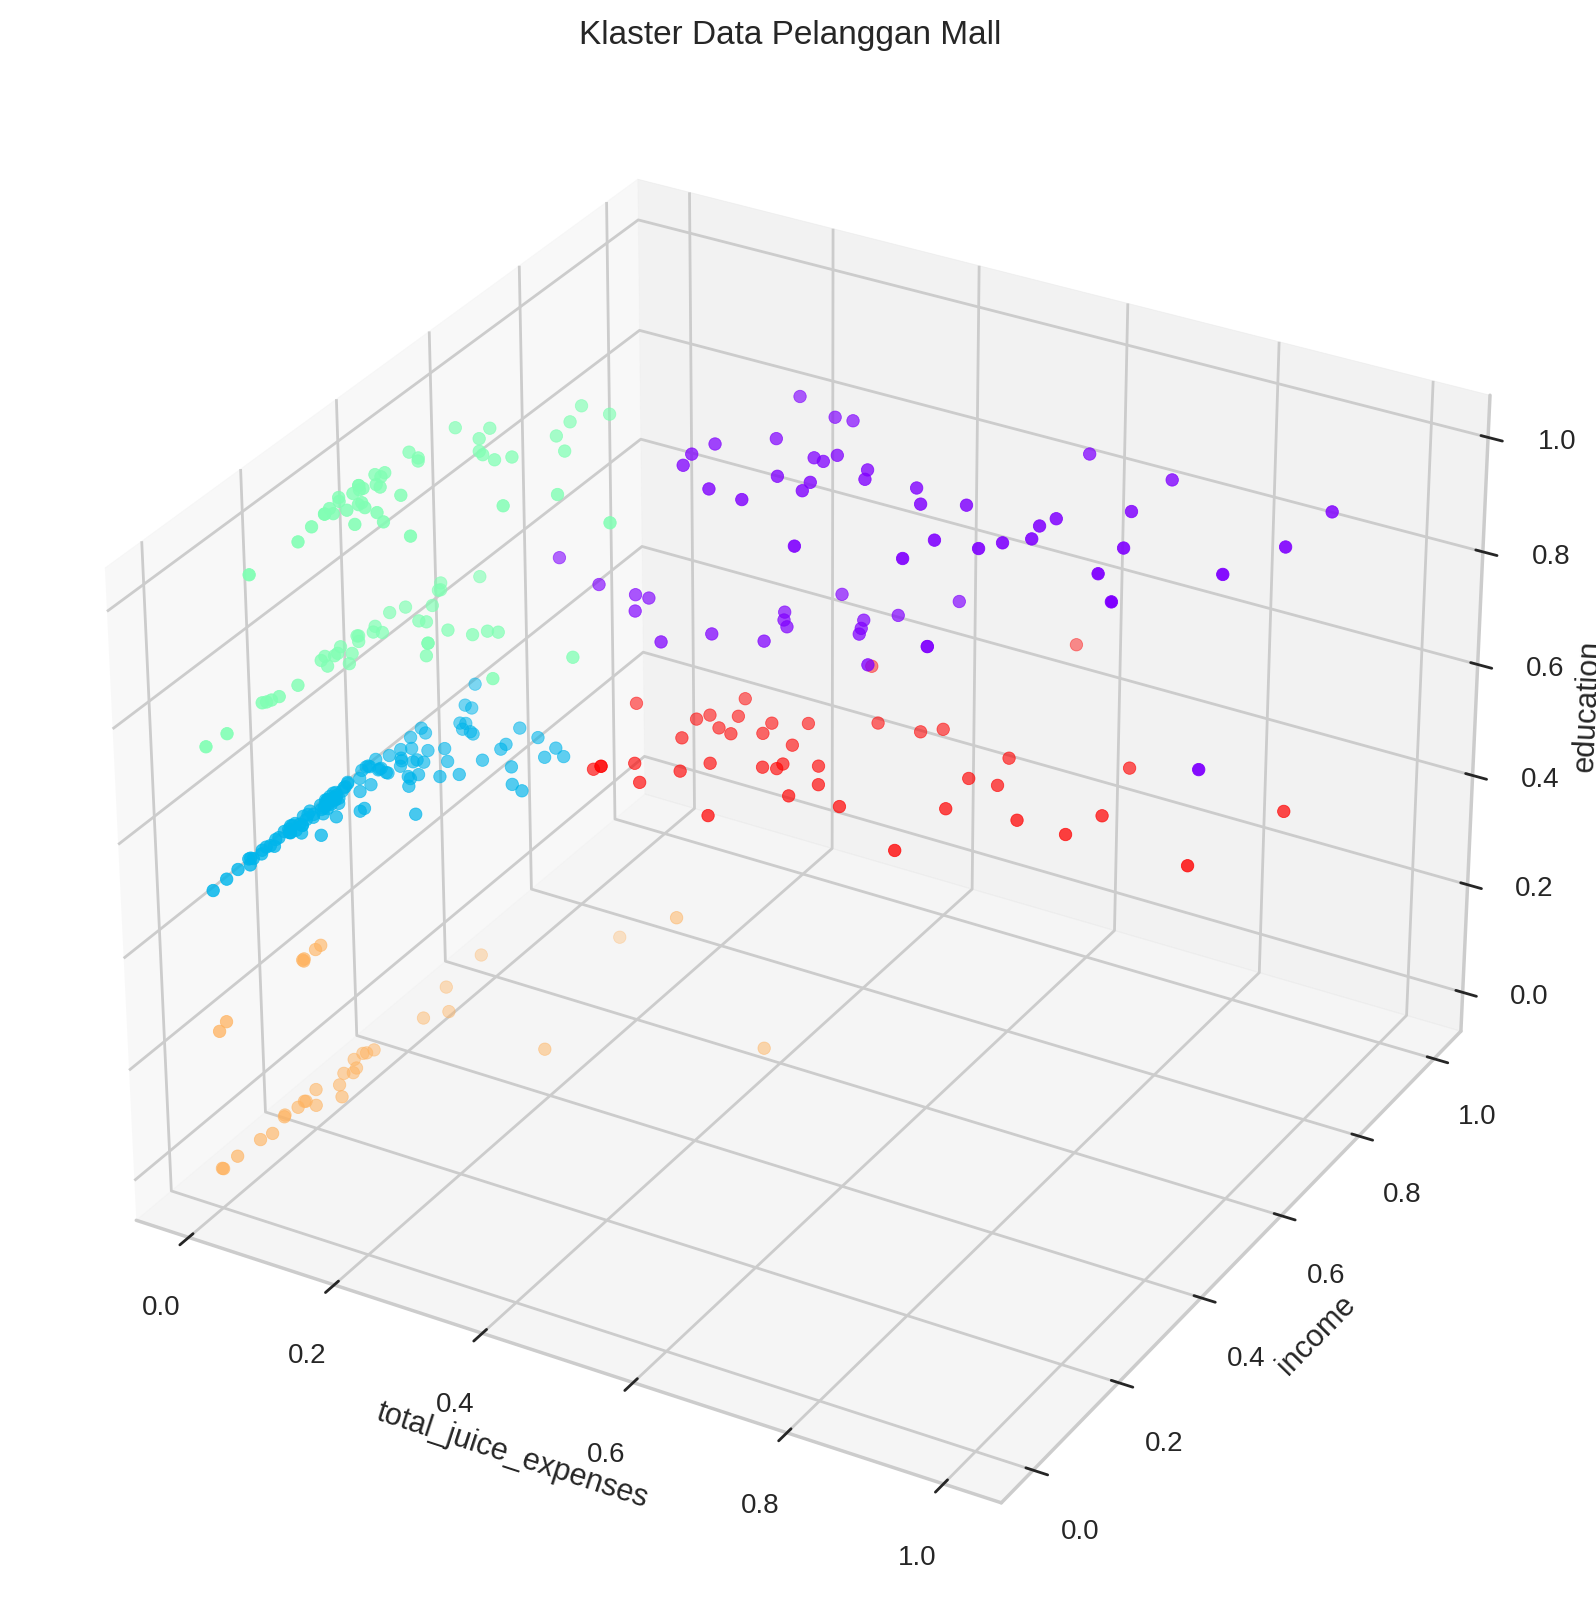

In [ ]:
# TODO: visualisasi

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = data_with_clusters['total_juice_expenses']
y = data_with_clusters['income']
z = data_with_clusters['education']
cluster = df_with_clusters['klaster']
 
# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Mall")
plt.grid(False)
ax.set_xlabel('total_juice_expenses')
ax.set_ylabel('income')
ax.set_zlabel('education')

plt.show()

TODO: komparasi dengan hasil K-Means

## **Pertanyaan Teori [30 poin]**

Jawab ketiga pertanyaan berikut dengan **mencantumkan sumbernya**.

### Soal 1 [10 poin]

K-Means adalah algoritma yang sangat populer karena relatif sederhana. Namun, algoritma ini tidak selalu cocok untuk semua kasus. **Jelaskan setidaknya dua kelemahan** dari algoritma ini.

TODO: 
1. Nilai k dipilih secara manual, belum tentu k yang dipilih adalah yang paling optimal, sehingga perlu dilakukan uji coba satu per satu.
2. Tidak baik untuk digunakan ketika data bervariasi size dan density nya. Perlu di generalisi terlebih dahulu.
3. Tidak cocok untuk data yang memiliki outlier karena centroid akan terbawa oleh outlier tersebut segingga harus dilakukan penghapusan outlier terlebih dahulu.


> sumber: https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages

### Soal 2 [10 poin]

**Jelaskan** perbedaan berbagai ***linkage*** yang didukung pada implementasi Agglomerative di Scikit-Learn (`sklearn.cluster.AgglomerativeClustering`).

TODO: 

- `'ward'` : Meminimalkan varian cluster yang digabungkan.
- `'average'` : Menggunakan rata-rata jarak setiap pengamatan dari dua set.
- `'complete'` atau `'maximum'` : Menggunakan jarak maksimum antara semua pengamatan dari dua set.
- `'single'` : Menggunakan minimum jarak antara semua pengamatan dari dua set.


> sumber: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### Soal 3 [10 poin]

Jika kita menjalankan `sklearn.cluster.KMeans` **berulang kali**, apakah akan selalu didapatkan **hasil yang sama**?

TODO: 

Tidak selalu. Hasil dari KMeans bergantung pada nilai init dan random_state. Jika menggunakan metode inisialisasi 'k-means++' atau ‘random’, hasilnya bisa berbeda setiap diulang. Jika nilai random_state ditentukan, hasilnya akan bisa sama. 

> sumber: https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/